# AIML CA2 Part A Report - Time Series
Done By: Ang Miao Yi

___
# Importing Modules
___

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To ignore any warnings

# Other libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.model_selection import ParameterGrid
from itertools import product
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA # ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model

# Metrics libraries
from sklearn.metrics import mean_absolute_percentage_error

___
# Importing Dataset
___

In [2]:
# Import dataset
df = pd.read_csv('./CA2-Dataset/CA2-Stock-Price-Data.csv', sep=',')
df_eda = df.copy()
df.head()

Date      Apple      Amazon        DBS
0  10/1/2018  56.814999  100.218002  25.969999
1  10/2/2018  57.320000   98.565498  25.629999
2  10/3/2018  58.017502   97.638000  25.950001
3  10/4/2018  56.997501   95.471001  25.760000
4  10/5/2018  56.072498   94.482498  25.770000

___
# Background Information
___

1. About the companies:
- Apple: Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer software, and online services
- Amazon: Amazon.com, Inc., doing business as Amazon, is an American multinational technology company focusing on e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence
- DBS: DBS Bank Limited, often known as DBS, is a Singaporean multinational banking and financial services corporation headquartered at the Marina Bay Financial Centre in the Marina Bay district of Singapore

2. Past Stock Performance
- Apple: Visually, based on past stock prices chart, although there are dips in stock prices, Apple, ingeneral, seems to have an increasing stock prices over the years. 
- Amazon: Based on Google Finance, it also seem that Amazon stock prices are increasing over the years. However, in 2022, we saw a drop in stock prices, most likely due to shrinking of markets and fears of a global recession grew after the COVID-19 pandemic
- DBS: Based on outlook of stock prices on Google Finance, although the stock prices has a general increasing trend over the past 5 years, it seems that the stock prices of DBS Group Holdings Limited has saw drop in their stock prices over the past one year

3. Analyse Market Trends - Competitors
- Apple: Apple is one of the companies which sell premium flapship products or services. Despite competitions from rival companies like Samsung, Xiaomi etc, Apple still remain as one of the best electronic companies due to their famous ecosystem, flapship-level experiences and many other serives. Therefore, Apple stock price might continue to rise due to their popularity and loyal fan-base.
- Amazon: Amazon remains as a trustable platform for purchasing items online to watching favourite movies/shows on their platform. Amazon has a lot of competitors, given their large scope of business activites. Still, Amazon remains as a top choice for consumers to purchase items or buy their services.
- DBS: DBS is one of bank cooperation, which handles large sum of transaction, and has many people setting bank accounts with DBS. However, with inflation and chance of recession in the next few years, it is uncertain if DBS will continue to maintain its stock price.

Source: 
- https://www.google.com/search?q=apple&rlz=1C1ONGR_enSG1050SG1050&oq=apple&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQRRg8MgYIAhBFGDsyBggDEEUYOzIGCAQQRRg8MgYIBRBFGDwyBggGEEUYPNIBCDQ3MjNqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8
- https://investor.apple.com/stock-price/default.aspx
- https://www.google.com/search?q=amazon&sca_esv=8e2660c4d8666842&rlz=1C1ONGR_enSG1050SG1050&sxsrf=ACQVn0-JXtNA3Jj5NENK5Ihr8kP3wpW8Hw%3A1707236423437&ei=R1zCZb2YGu_iseMP0u2auAU&oq=ama&gs_lp=Egxnd3Mtd2l6LXNlcnAiA2FtYSoCCAAyChAjGIAEGIoFGCcyChAjGIAEGIoFGCcyChAjGIAEGIoFGCcyEBAuGIAEGIoFGMcBGNEDGCcyGhAuGIMBGMcBGJECGLEDGMkDGNEDGIAEGIoFMhEQABiABBiKBRiRAhixAxiDATIQEC4YgAQYigUYQxjHARjRAzIKEAAYgAQYigUYQzIQEAAYgAQYigUYQxixAxiDATIQEAAYgAQYigUYQxixAxiDAUjYG1CMEFirEnABeAGQAQCYAVugAfgBqgEBM7gBA8gBAPgBAagCEcICBxAjGOoCGCfCAhMQABiABBiKBRhDGOoCGLQC2AEBwgIUEAAYgAQY4wQY6QQY6gIYtALYAQHCAh0QLhiABBjjBBjpBBjHARjRAxjIAxjqAhi0AtgBAsICERAuGIAEGIoFGJECGMcBGNEDwgILEAAYgAQYigUYkQLCAhYQLhiABBiKBRhDGLEDGIMBGMcBGNEDwgIOEAAYgAQYigUYsQMYgwHCAhcQLhiABBiKBRiRAhixAxiDARjHARjRA-IDBBgAIEG6BgYIARABGAG6BgYIAhABGAg&sclient=gws-wiz-serp
- https://www.google.com/search?q=dbs+bank+limited&sca_esv=8e2660c4d8666842&rlz=1C1ONGR_enSG1050SG1050&sxsrf=ACQVn0_c7mfGr35MOa_5zujwyuZxKyjgnA%3A1707236401700&ei=MVzCZbi8KpKgseMPnYS88AY&oq=dbs&gs_lp=Egxnd3Mtd2l6LXNlcnAiA2RicyoCCAEyChAjGIAEGIoFGCcyChAjGIAEGIoFGCcyChAjGIAEGIoFGCcyHBAuGEMYgwEYxwEYkgMYsQMYyQMY0QMYgAQYigUyEBAAGIAEGIoFGEMYsQMYgwEyChAAGIAEGIoFGEMyEBAAGIAEGIoFGEMYsQMYgwEyCxAAGIAEGLEDGIMBMgoQABiABBiKBRhDMgoQABiABBiKBRhDSI4TUIgGWJMLcAF4AZABAJgBUKAB3gGqAQEzuAEDyAEA-AEBqAITwgIHECMY6gIYJ8ICExAAGIAEGIoFGEMY6gIYtALYAQHCAhwQLhiABBiKBRhDGMcBGNEDGMgDGOoCGLQC2AECwgIWEC4YgAQYigUYQxjIAxjqAhi0AtgBAsICBBAjGCfCAhcQLhiABBiKBRiRAhixAxiDARjHARjRA8ICERAAGIAEGIoFGJECGLEDGIMBwgIOEAAYgAQYigUYsQMYgwHCAgsQLhiABBjHARjRA8ICBRAAGIAEwgImEC4YgAQYigUYkQIYsQMYgwEYxwEY0QMYlwUY3AQY3gQY4ATYAQPCAhYQLhhDGIMBGMcBGLEDGNEDGIAEGIoFwgIrEC4YQxiDARjHARiSAxixAxjJAxjRAxiABBiKBRiXBRjcBBjeBBjgBNgBA-IDBBgAIEG6BgYIARABGAG6BgYIAhABGAi6BgYIAxABGBQ&sclient=gws-wiz-serp
- https://www.google.com/finance/?hl=en
- https://capital.com/amazon-stock-forecast-is-it-a-buy#:~:text=In%202022%2C%20the%20Amazon%20(AMZN,of%20a%20global%20recession%20grew.)

___
# Data Exploration (EDA)
____

Summary Statistics - mean, median, standard deviation, minimum, and maximum for each stock's price

In [3]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Apple   1257 non-null   float64
 2   Amazon  1257 non-null   float64
 3   DBS     1257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


Date is an object type, thus we will need to turn it into a date dtype later, into YYYY-MM-DD format

The other values that we will be predicting are all continuous float values. Thus we will not need to alter their values.

In [4]:
df_eda.shape

(1257, 4)

In [5]:
df_eda.describe()

Apple       Amazon          DBS
count  1257.000000  1257.000000  1257.000000
mean    116.168385   124.791237    28.185863
std      46.945568    32.495925     4.738732
min      35.547501    67.197998    16.879999
25%      66.592499    93.489998    24.879999
50%     129.610001   120.970001    28.650000
75%     152.589996   158.100494    32.480000
max     196.449997   186.570496    37.250000

In [6]:
df_eda.isna().sum()

Date      0
Apple     0
Amazon    0
DBS       0
dtype: int64

There are no Null values, thus we will not need to do handling for it

As said on top, the date column is an object dtype. Thus we will use ".to_datetime" to convert the DATE and replace the column with the new set of values. After that, we set the DATE as the index of the data 

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

Apple      Amazon        DBS
Date                                        
2018-10-01  56.814999  100.218002  25.969999
2018-10-02  57.320000   98.565498  25.629999
2018-10-03  58.017502   97.638000  25.950001
2018-10-04  56.997501   95.471001  25.760000
2018-10-05  56.072498   94.482498  25.770000

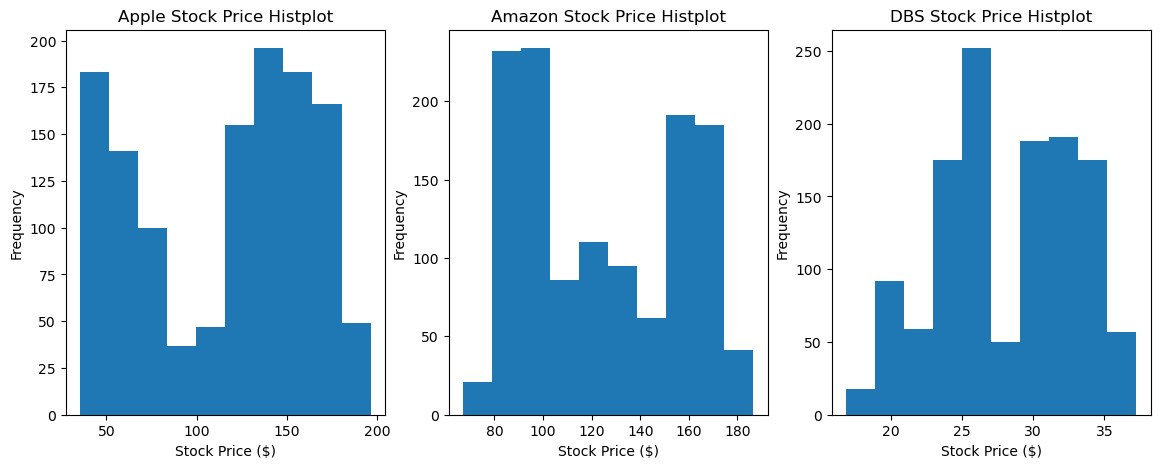

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
df['Apple'].plot(ax=ax[0], kind='hist')
df['Amazon'].plot(ax=ax[1], kind='hist')
df['DBS'].plot(ax=ax[2], kind='hist')
ax[0].set_title('Apple Stock Price Histplot')
ax[0].set_xlabel('Stock Price ($)')
ax[1].set_title('Amazon Stock Price Histplot')
ax[1].set_xlabel('Stock Price ($)')
ax[2].set_title('DBS Stock Price Histplot')
ax[2].set_xlabel('Stock Price ($)')
plt.show()

Observations: It seems that all three companies stock prices are not normally distributed as there is no visible bell shape with a peak in the middle. This means that all three columns are not stationary time series because the time series should conform to Gaussian distribution (bell curve) if it is stationary. In this case, it is not.

___
# P-Value
___

In [9]:
# Augmented Dickey-Fuller Test
adftest1 = adfuller(df['Apple'])
adftest2 = adfuller(df['Amazon'])
adftest3 = adfuller(df['DBS'])

print('Apple Stock\nNumber of Observation:', adftest1[3], '\nP-value:', adftest1[1], '\n')
print('Amazon Stock\nNumber of Observation:', adftest2[3], '\nP-value:', adftest2[1], '\n')
print('DBS\nNumber of Observation:', adftest3[3], '\nP-value:', adftest3[1])

Apple Stock
Number of Observation: 1256 
P-value: 0.7650692611897277 

Amazon Stock
Number of Observation: 1256 
P-value: 0.45865276453651455 

DBS
Number of Observation: 1254 
P-value: 0.6556796201732037


##### Result of ADF Test on three series:
- Apple Stock: P-value = 0.765 (> 0.05), fail to reject null hypothesis (H0), thus the data has a unit root and is non-stationary
- Amazon Stock: P-value = 0.459 (> 0.05), fail to reject null hypothesis (H0), thus the data has a unit root and is non-stationary
- DBS Stock: P-value = 0.656 (> 0.05), fail to reject null hypothesis (H0), thus the data has a unit root and is non-stationary

- As the Apple, Amazon and DBS stock data is not stationary, I will need to do order differencing on it.

In [10]:
# Calculate mean and variance for each column
for column in ['Apple', 'Amazon', 'DBS']:
    mean = df[column].mean()
    variance = df[column].var()
    
    print(f'For {column}:\nMean = {mean:.2f}\nVariance = {variance:.2f}\n')


For Apple:
Mean = 116.17
Variance = 2203.89

For Amazon:
Mean = 124.79
Variance = 1055.99

For DBS:
Mean = 28.19
Variance = 22.46



For a stationary time series, they should always have the same mean and variance values. However, it seems that our time series is not stationary as the mean and variance are different.

___
# Visualisation of Time Series
___

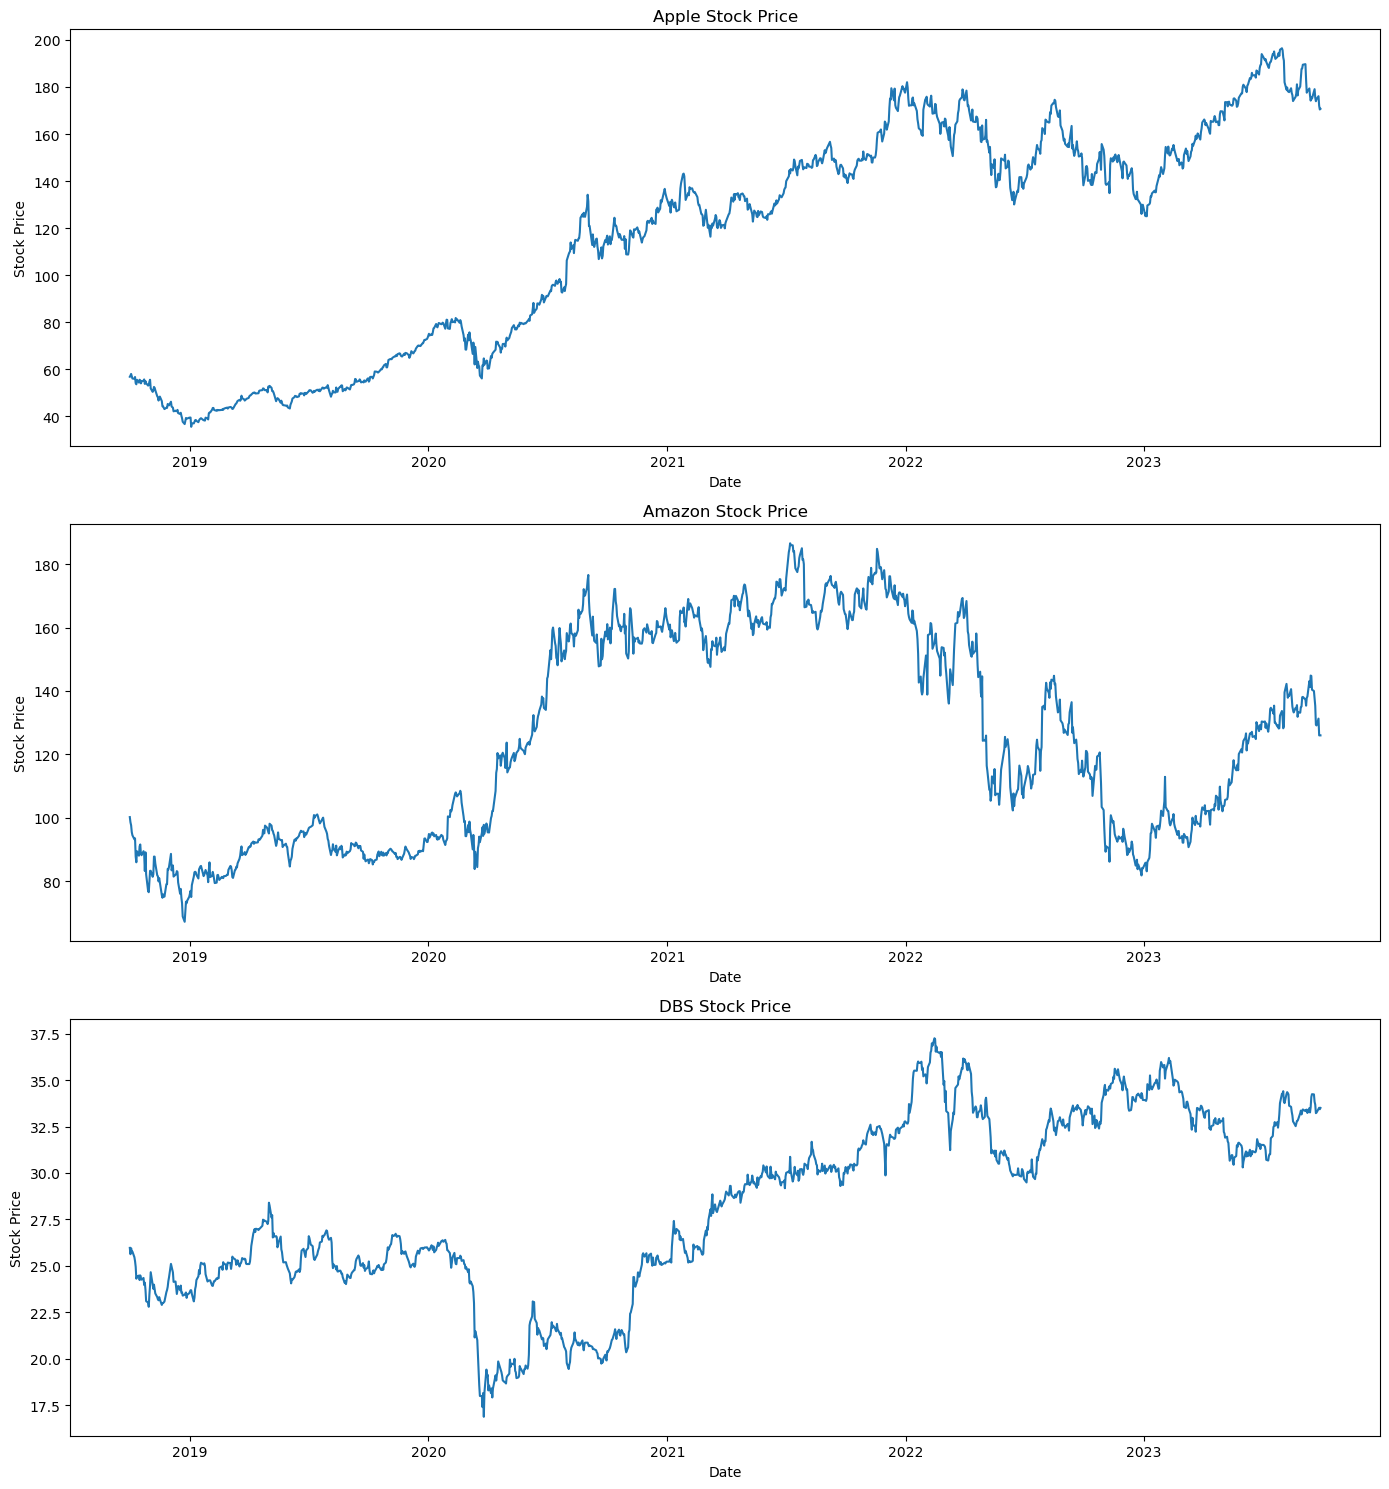

In [11]:
# Visual Check for all three stocks
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

axes[0].plot(df.index, df['Apple'])
axes[0].set_ylabel('Stock Price')
axes[0].set_xlabel('Date')
axes[0].set_title('Apple Stock Price')

axes[1].plot(df.index, df['Amazon'])
axes[1].set_ylabel('Stock Price')
axes[1].set_xlabel('Date')
axes[1].set_title('Amazon Stock Price')

axes[2].plot(df.index, df['DBS'])
axes[2].set_ylabel('Stock Price')
axes[2].set_xlabel('Date')
axes[2].set_title('DBS Stock Price')

plt.tight_layout()
plt.show()

Observations:
- Apple: There is a lot of spikes which mean there is a very high variance in Apple Stock Price, and we can observe an overall upward trend despite dips in stock price in some years. No observed seasonality.
- Amazon: There is a lot of spikes which means there is high variance in Amazon Stock Price. No trend observed (Going up and down). No seasonality observed.
- DBS: There is a lot of spikes which means there is high variance in DBS Stock Price. No trend observed (Stock Prices going up and down - Fluctuating). No seasonality observed.

___
# Seasonal Decomposition
___

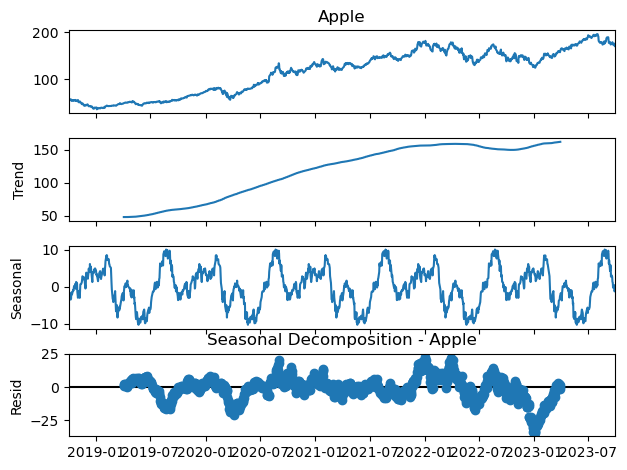

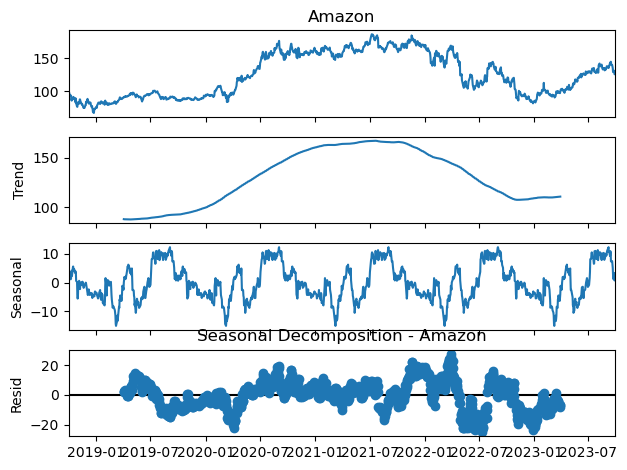

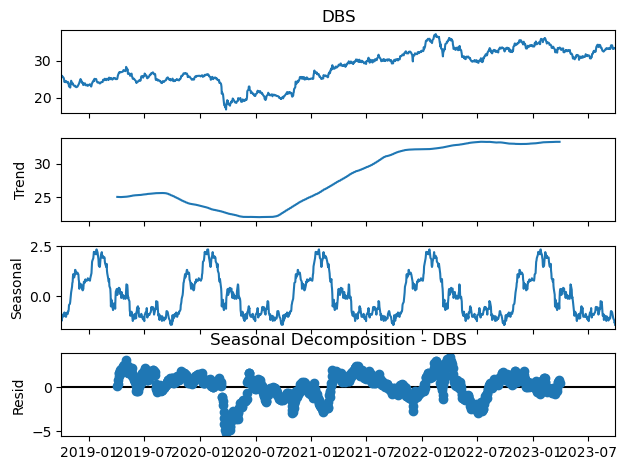

In [12]:
# Loop through each column and perform seasonal decomposition
for column in ['Apple', 'Amazon', 'DBS']:
    result_daily = seasonal_decompose(df[column], model='additive', period=252)
    result_daily.plot()
    plt.title(f'Seasonal Decomposition - {column}')
    plt.show()

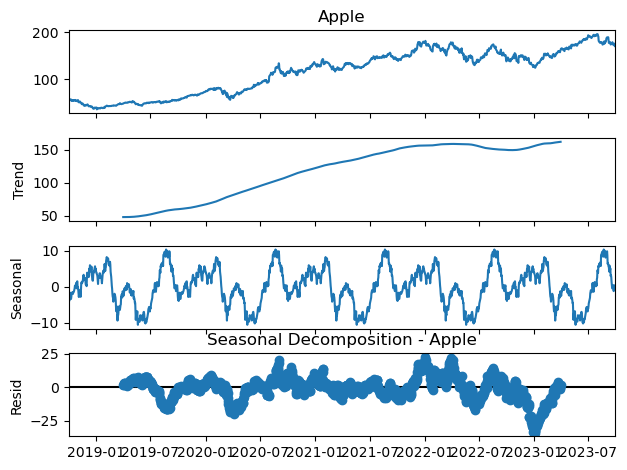

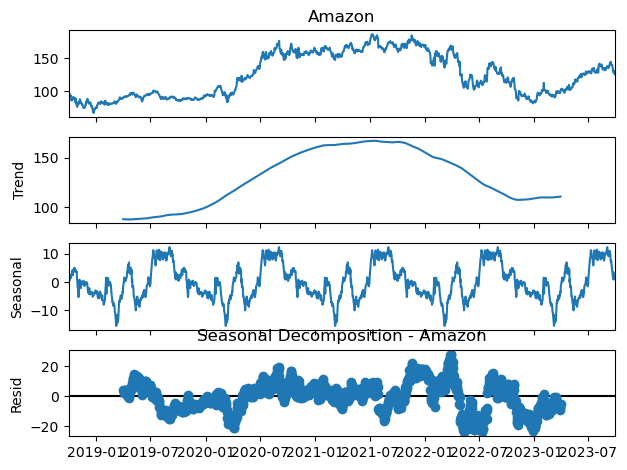

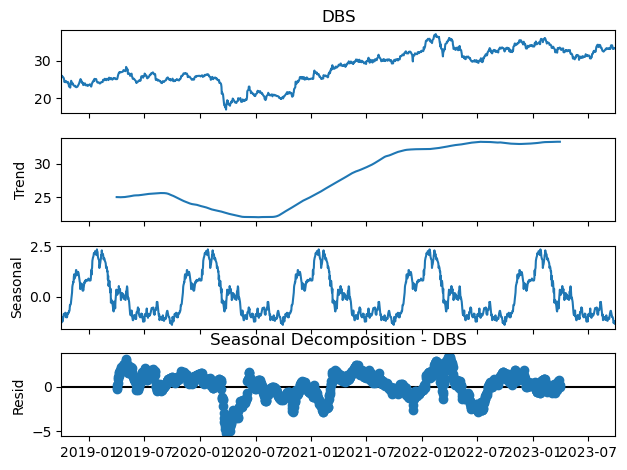

In [13]:
# Resample the data to ensure daily frequency and fill missing values with linear interpolation
df_daily = df.resample('D').asfreq().interpolate(method='linear')

# Loop through each column and perform seasonal decomposition
for column in ['Apple', 'Amazon', 'DBS']:
    result_daily = seasonal_decompose(df_daily[column], model='additive', period=365)
    result_daily.plot()
    plt.title(f'Seasonal Decomposition - {column}')
    plt.show()

From the three seasonality plot, I can observe an obvious cycle.
1. Apple
    - Trend: This is the long-term upward movement in the data.
    - Seasonal: This is the regular up-and-down movement in the data that occurs over a period of time, such as a year.
    - Residual: This is the part of the data that cannot be explained by the trend or the seasonal component.
    - The seasonal component shows that Apple's revenue tends to be higher in the fourth quarter of each year, which is typically the holiday season. The residual component shows the random fluctuations in the data that are not captured by the trend or the seasonal component.
2. Amazon
    - Trend: This is the long-term upward or downward movement in the data.
    - Seasonal: This is the regular up-and-down movement in the data that occurs over a period of time, such as a year.
    - Residual: This is the part of the data that cannot be explained by the trend or the seasonal component
    - The seasonal component shows that Amazon's stock price tends to be higher in the fourth quarter of each year, which is typically the holiday season when online retail sales are higher. There is also a smaller peak in the second quarter, which may coincide with Prime Day sales in July.
3. DBS
    - Trend: This is the long-term upward movement in the data.
    - Seasonal: This is the regular up-and-down movement in the data that occurs over a period of time, such as a year.
    - Residual: This is the part of the data that cannot be explained by the trend or the seasonal component.
    - The seasonal component shows that DBS's stock price tends to be higher in the fourth quarter of each year. There is also a smaller peak in the second quarter. The residual component shows the random fluctuations in the data that are not captured by the trend or the seasonal component. These fluctuations can be caused by a variety of factors, such as company news, earnings reports, and overall market conditions.

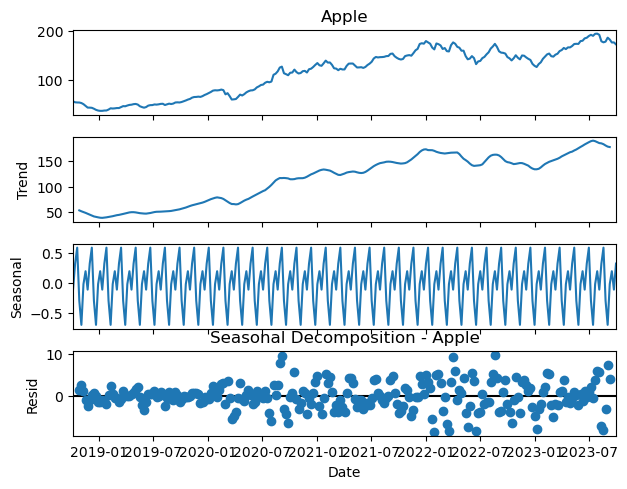

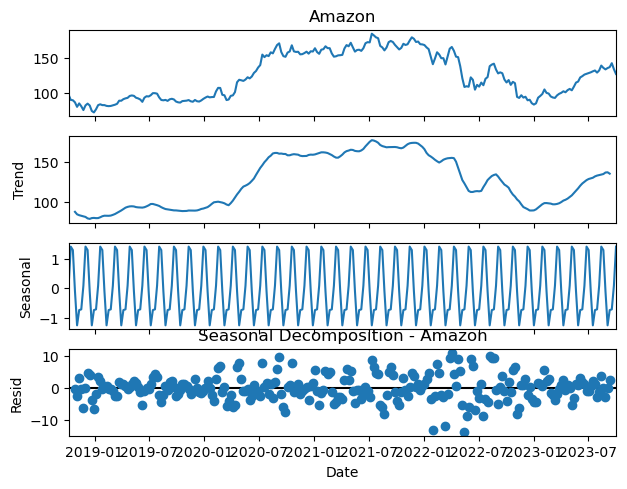

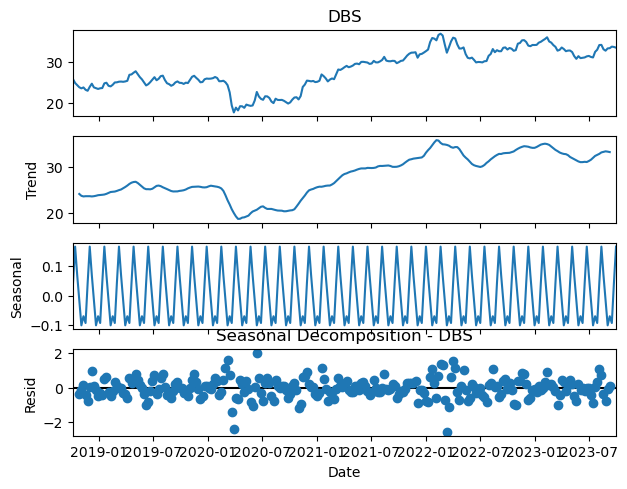

In [14]:
# Resample the data to ensure weekly frequency
df_weekly = df.resample('W').mean()

# Fill missing values with linear interpolation
df_weekly = df_weekly.interpolate(method='linear')

# Loop through each column and perform seasonal decomposition
for column in ['Apple', 'Amazon', 'DBS']:
    result_weekly = seasonal_decompose(df_weekly[column], model='additive', period=7)  # weekly seasonality
    result_weekly.plot()
    plt.title(f'Seasonal Decomposition - {column}')
    plt.xlabel('Date')  # Set x-axis label
    plt.show()

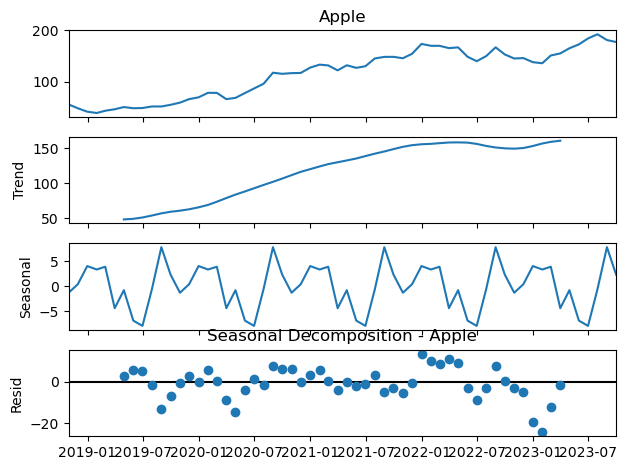

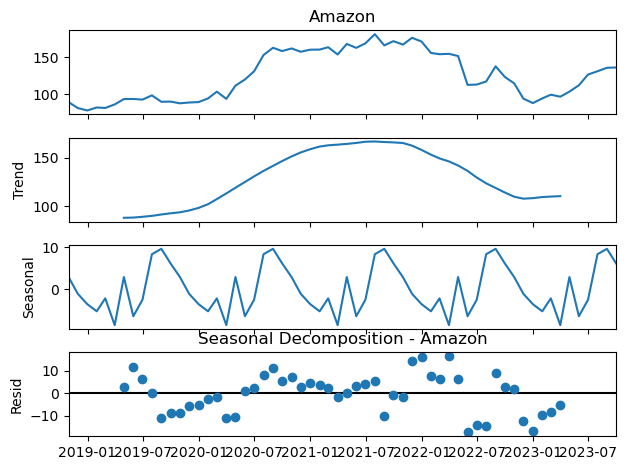

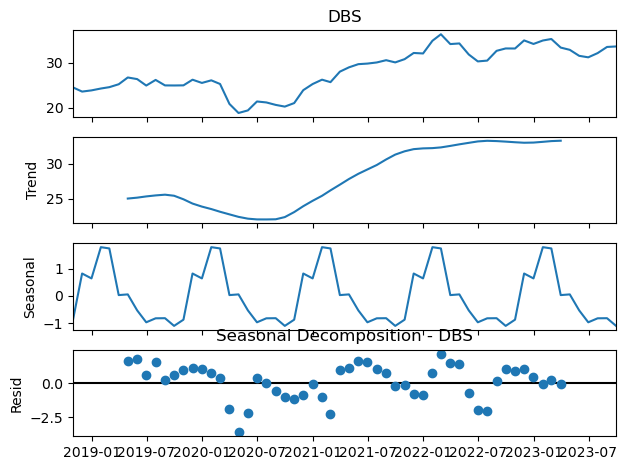

In [15]:
# Resample the data to ensure monthly frequency
df_monthly = df.resample('M').mean()

# # Fill missing values with linear interpolation
df_monthly = df_monthly.interpolate(method='linear')

# Loop through each column and perform seasonal decomposition
for column in ['Apple', 'Amazon', 'DBS']:
    result_monthly = seasonal_decompose(df_monthly[column], model='additive', period=12)  # monthly seasonality
    result_monthly.plot()
    plt.title(f'Seasonal Decomposition - {column}')
    plt.show()

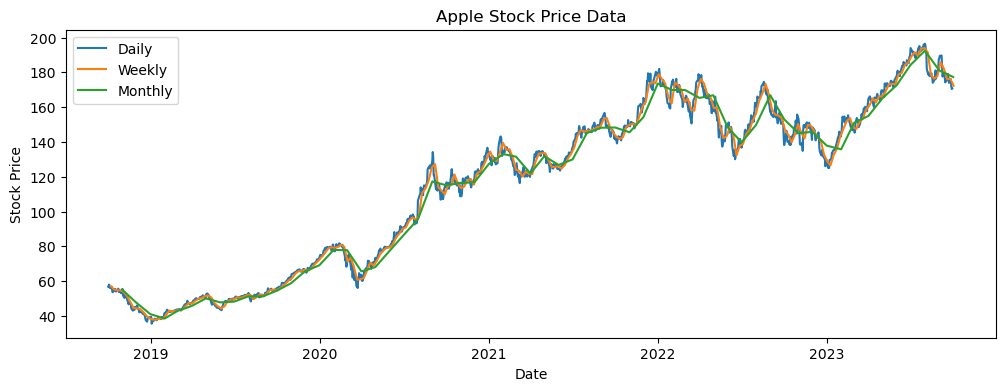

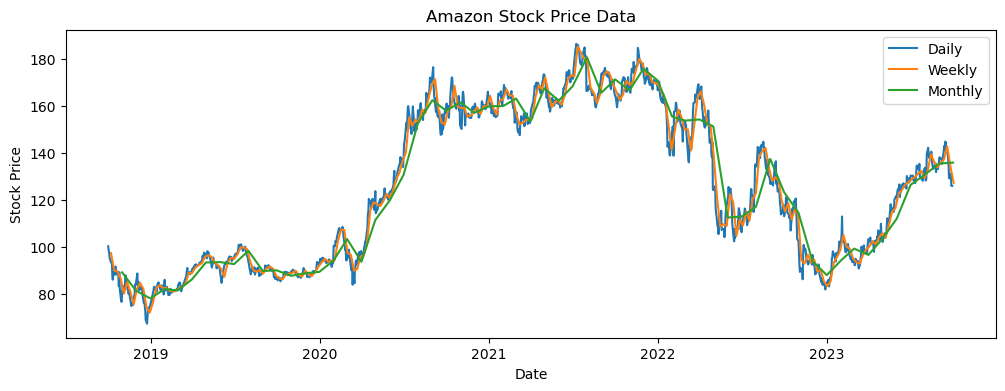

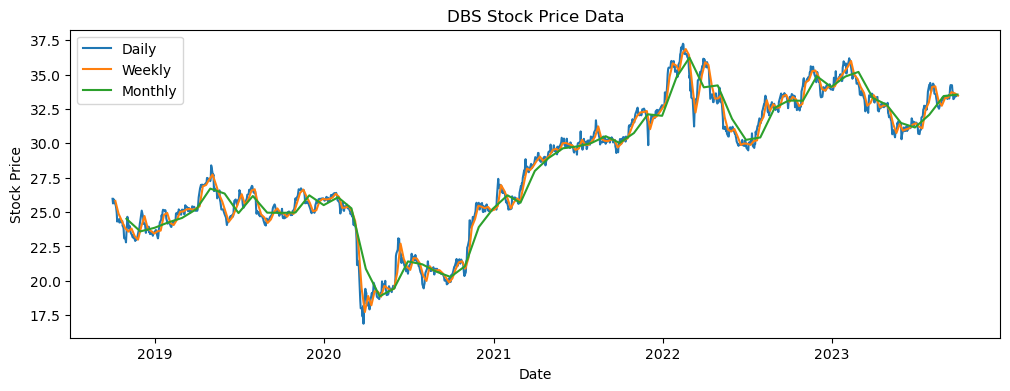

In [16]:
# Apple stock price data
# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(df['Apple'], label='Daily')
plt.plot(df_weekly['Apple'], label='Weekly')
plt.plot(df_monthly['Apple'], label='Monthly')
plt.title('Apple Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Amazon stock price data
# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(df['Amazon'], label='Daily')
plt.plot(df_weekly['Amazon'], label='Weekly')
plt.plot(df_monthly['Amazon'], label='Monthly')
plt.title('Amazon Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# DBS stock price data
# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(df['DBS'], label='Daily')
plt.plot(df_weekly['DBS'], label='Weekly')
plt.plot(df_monthly['DBS'], label='Monthly')
plt.title('DBS Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The code from above cell uses Matplotlib to plot the daily, weekly, and monthly stock price data for three companies: Apple, Amazon, and DBS. Each snippet creates a figure with three subplots, showing the stock prices for the corresponding company. The `plt.plot()` function is used to plot the data obtained from different DataFrames `df`, `df_weekly`, and `df_monthly`. The plots are labeled and displayed for each company, providing a visual representation of their stock price variations over time.

___
# Differencing
___

As the stock price data of Apple, Amazon and DBS are not stationary, I will need to do order differencing on all three of them.

Apple Stock before differencing (p-value): 0.765069
Apple Stock after differencing (p-value): 0.000000

Amazon Stock before differencing (p-value): 0.458653
Amazon Stock after differencing (p-value): 0.000000

DBS before differencing (p-value): 0.655680
DBS after differencing (p-value): 0.000000


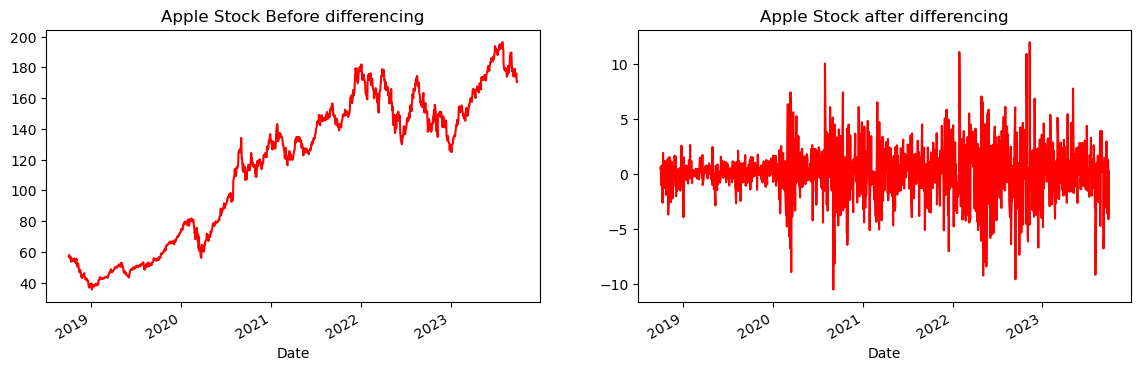

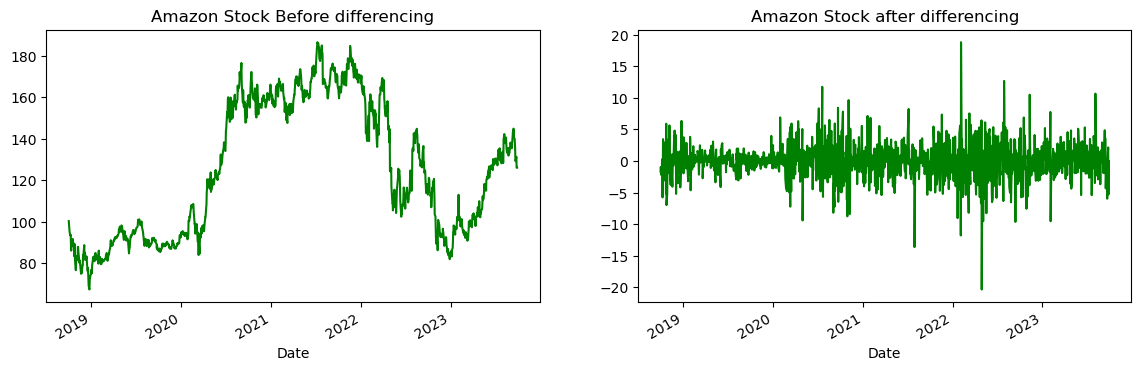

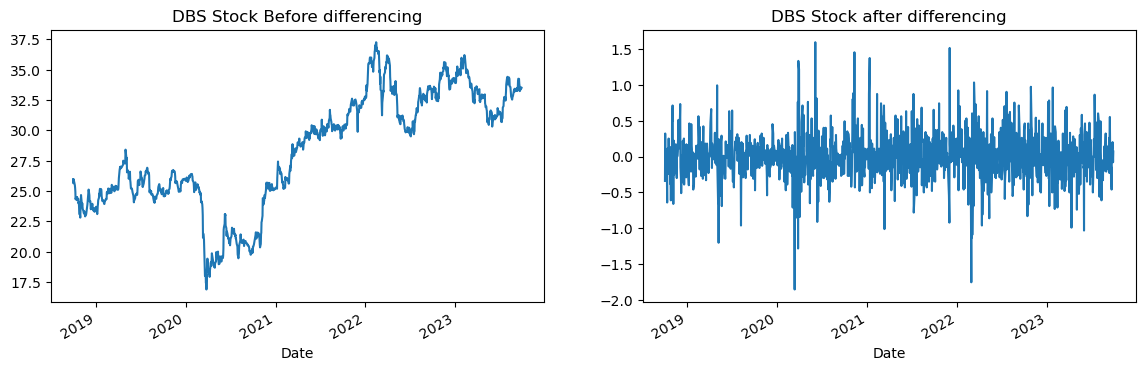

In [17]:
# Differencing to make the series stationary
df_diff = diff(df, k_diff=1)

# Augmented Dickey-Fuller Test - Before and After Differencing
adfuller_result_apple_before = adfuller(df['Apple'])
adfuller_result_amazon_before = adfuller(df['Amazon'])
adfuller_result_dbs_before = adfuller(df['DBS'])

adfuller_result_apple_after = adfuller(df_diff['Apple'])
adfuller_result_amazon_after = adfuller(df_diff['Amazon'])
adfuller_result_dbs_after = adfuller(df_diff['DBS'])


print('Apple Stock before differencing (p-value): %f' % adfuller_result_apple_before[1])
print('Apple Stock after differencing (p-value): %f\n' % adfuller_result_apple_after[1])
print('Amazon Stock before differencing (p-value): %f' % adfuller_result_amazon_before[1])
print('Amazon Stock after differencing (p-value): %f\n' % adfuller_result_amazon_after[1])
print('DBS before differencing (p-value): %f' % adfuller_result_dbs_before[1])
print('DBS after differencing (p-value): %f' % adfuller_result_dbs_after[1])

# Plot the differenced series
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['Apple'].plot(ax=ax[0], color='r')
df_diff['Apple'].plot(ax=ax[1], color='r')
ax[0].set_title('Apple Stock Before differencing')
ax[1].set_title('Apple Stock after differencing')

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['Amazon'].plot(ax=ax[0], color='g')
df_diff['Amazon'].plot(ax=ax[1], color='g')
ax[0].set_title('Amazon Stock Before differencing')
ax[1].set_title('Amazon Stock after differencing')

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['DBS'].plot(ax=ax[0])
df_diff['DBS'].plot(ax=ax[1])
ax[0].set_title('DBS Stock Before differencing')
ax[1].set_title('DBS Stock after differencing')

plt.show()

Explanation: I conducted differencing on stock price data to achieve stationarity, a standard procedure in time series analysis. The Augmented Dickey-Fuller test evaluates stationarity before and after differencing for Apple, Amazon, and DBS stocks. The `diff()` function computes differences with a lag of 1, while `adfuller()` calculates p-values for stationarity. Plots illustrate the original and differenced stock price series, highlighting the effect of differencing on stationarity.

Observations: From the results in the cell above, we can see that when we check the P-value using the differenced time series, the P-value is 0.0, which is less that 0.05. This means that the differencing value of 1 is sufficient to make the time series stationary. Hence, we will use the d as 1 when doing S-ARIMA and ARIMA models later.

___
# ACF
___

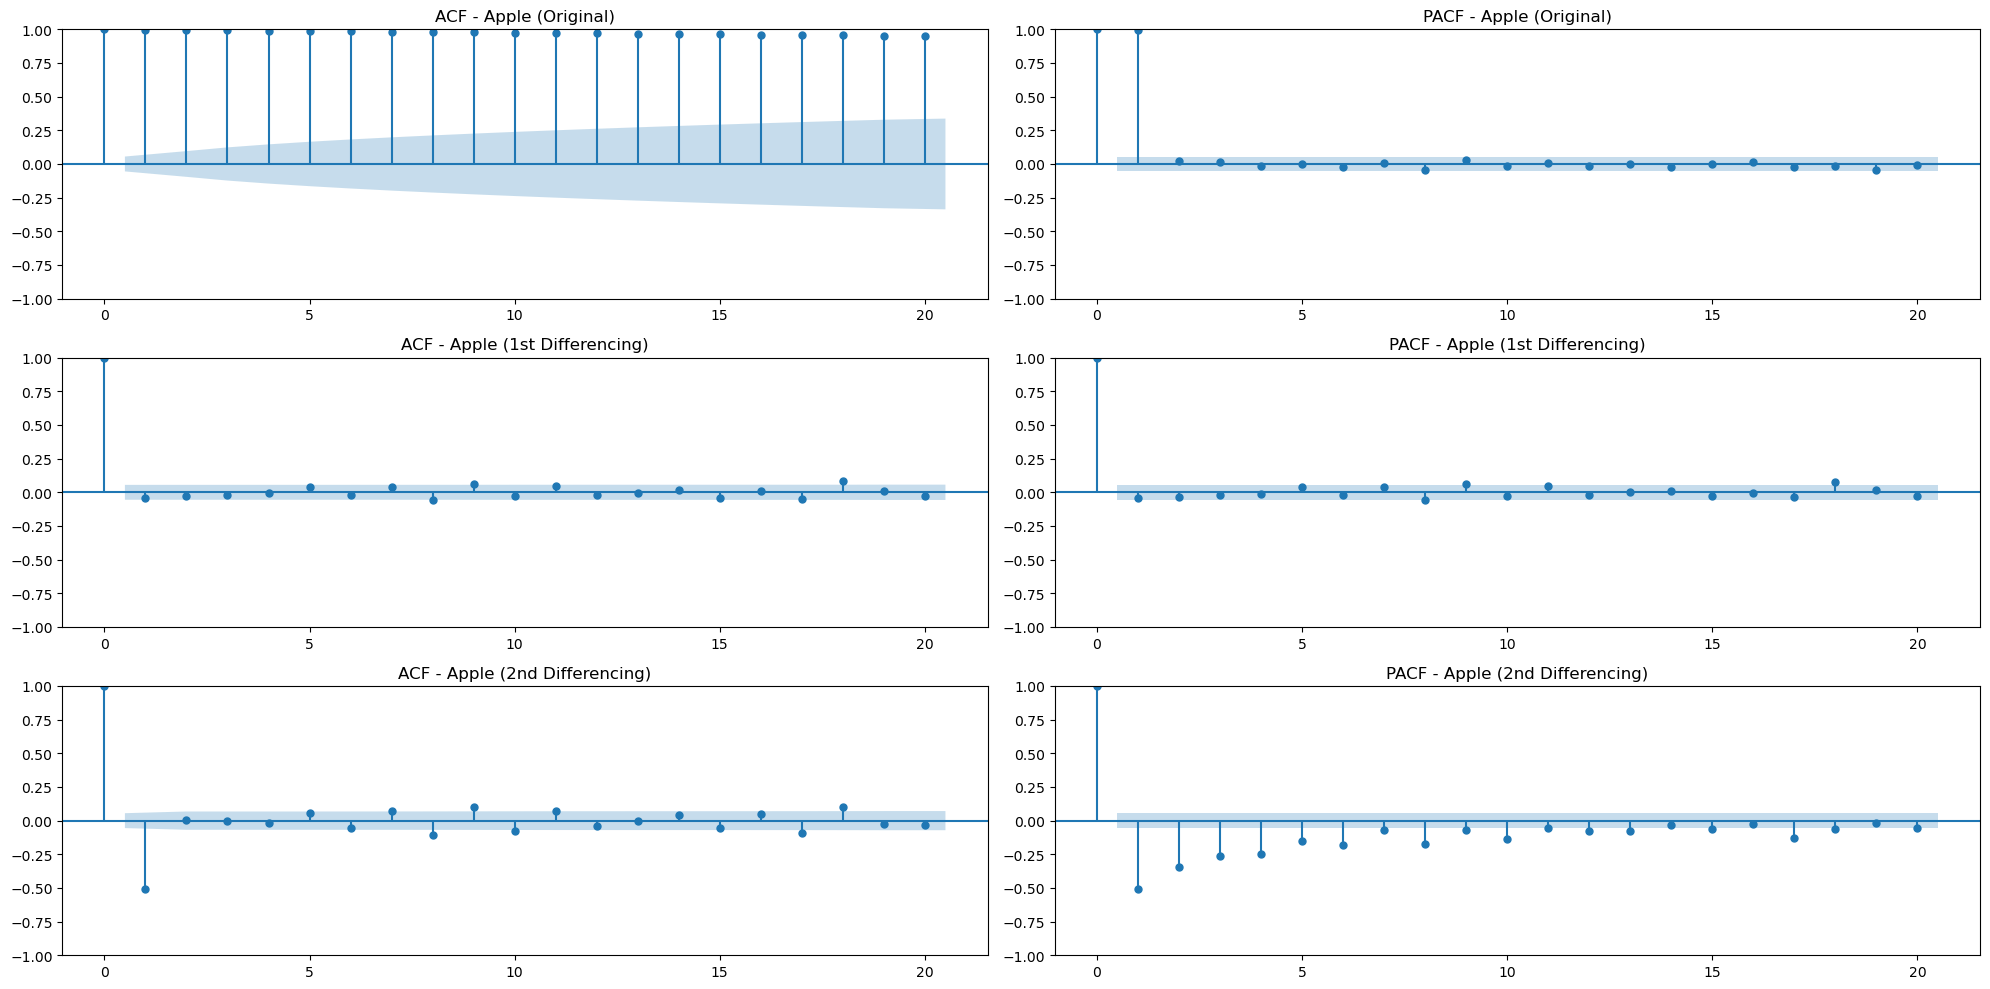

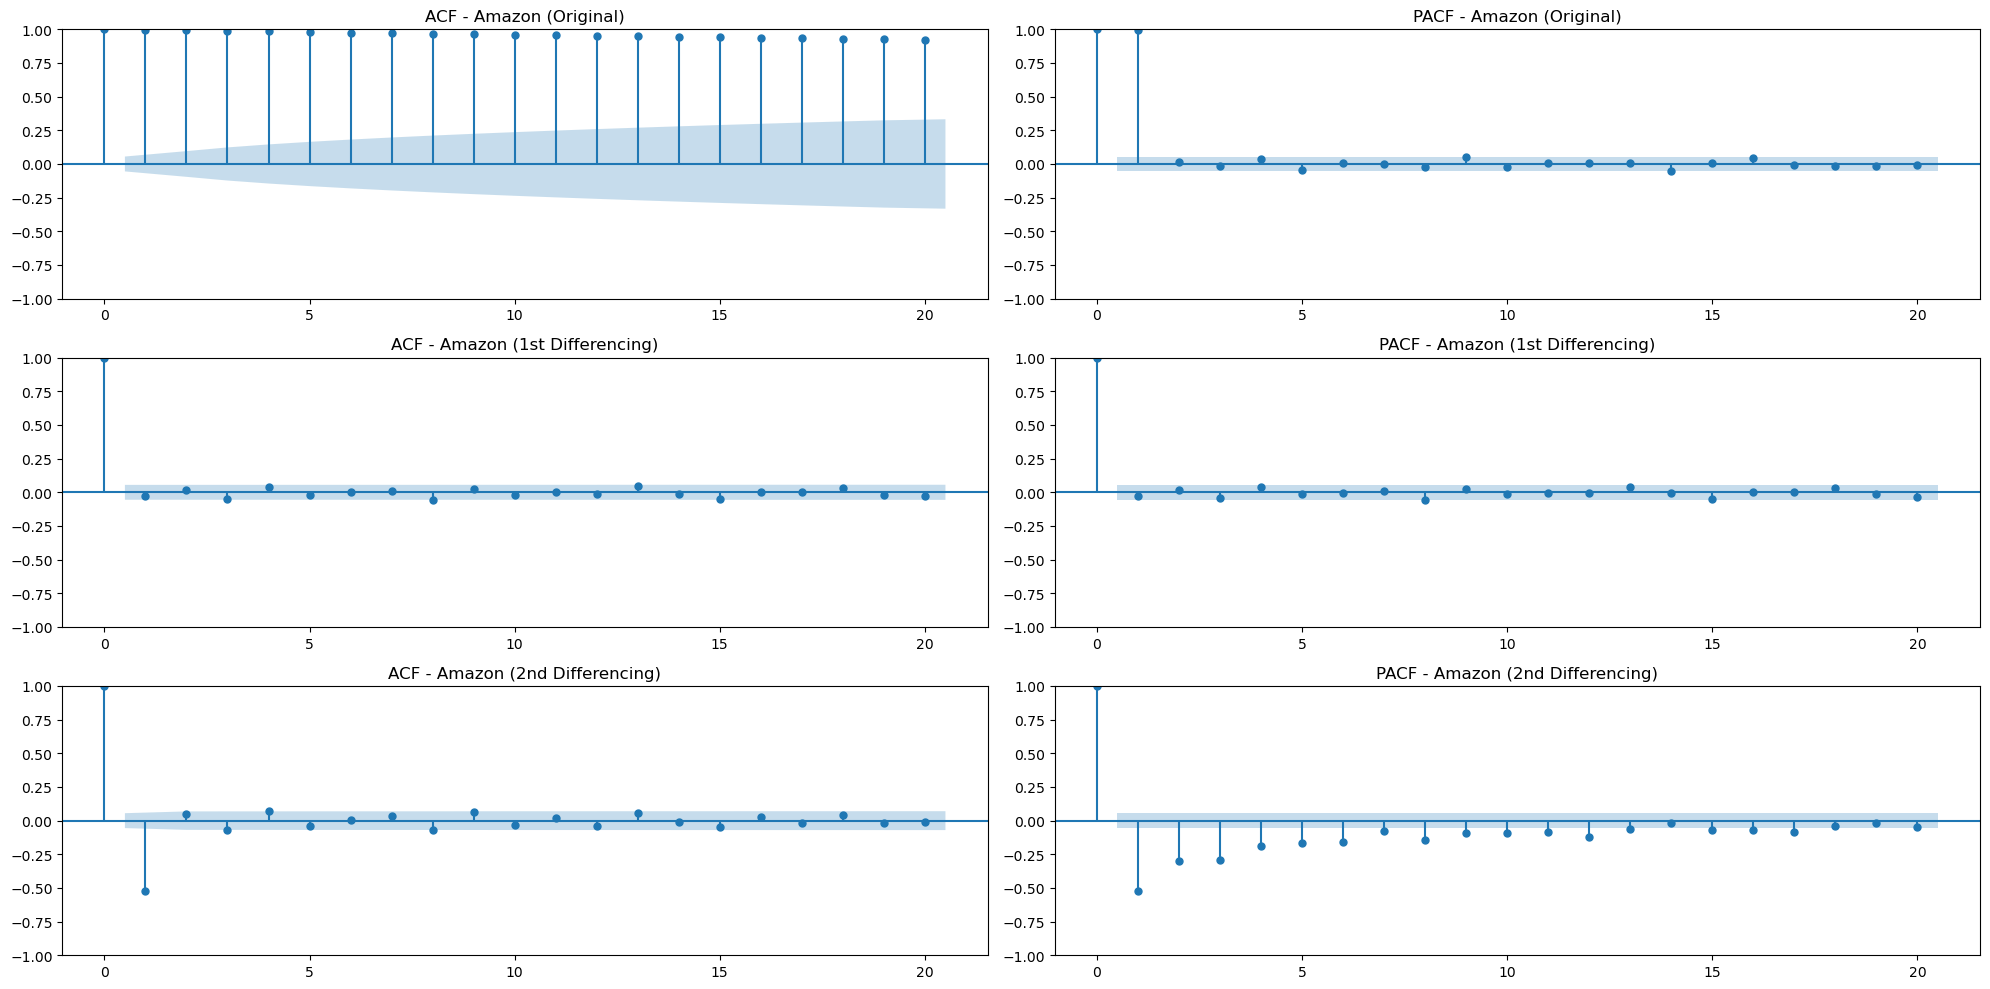

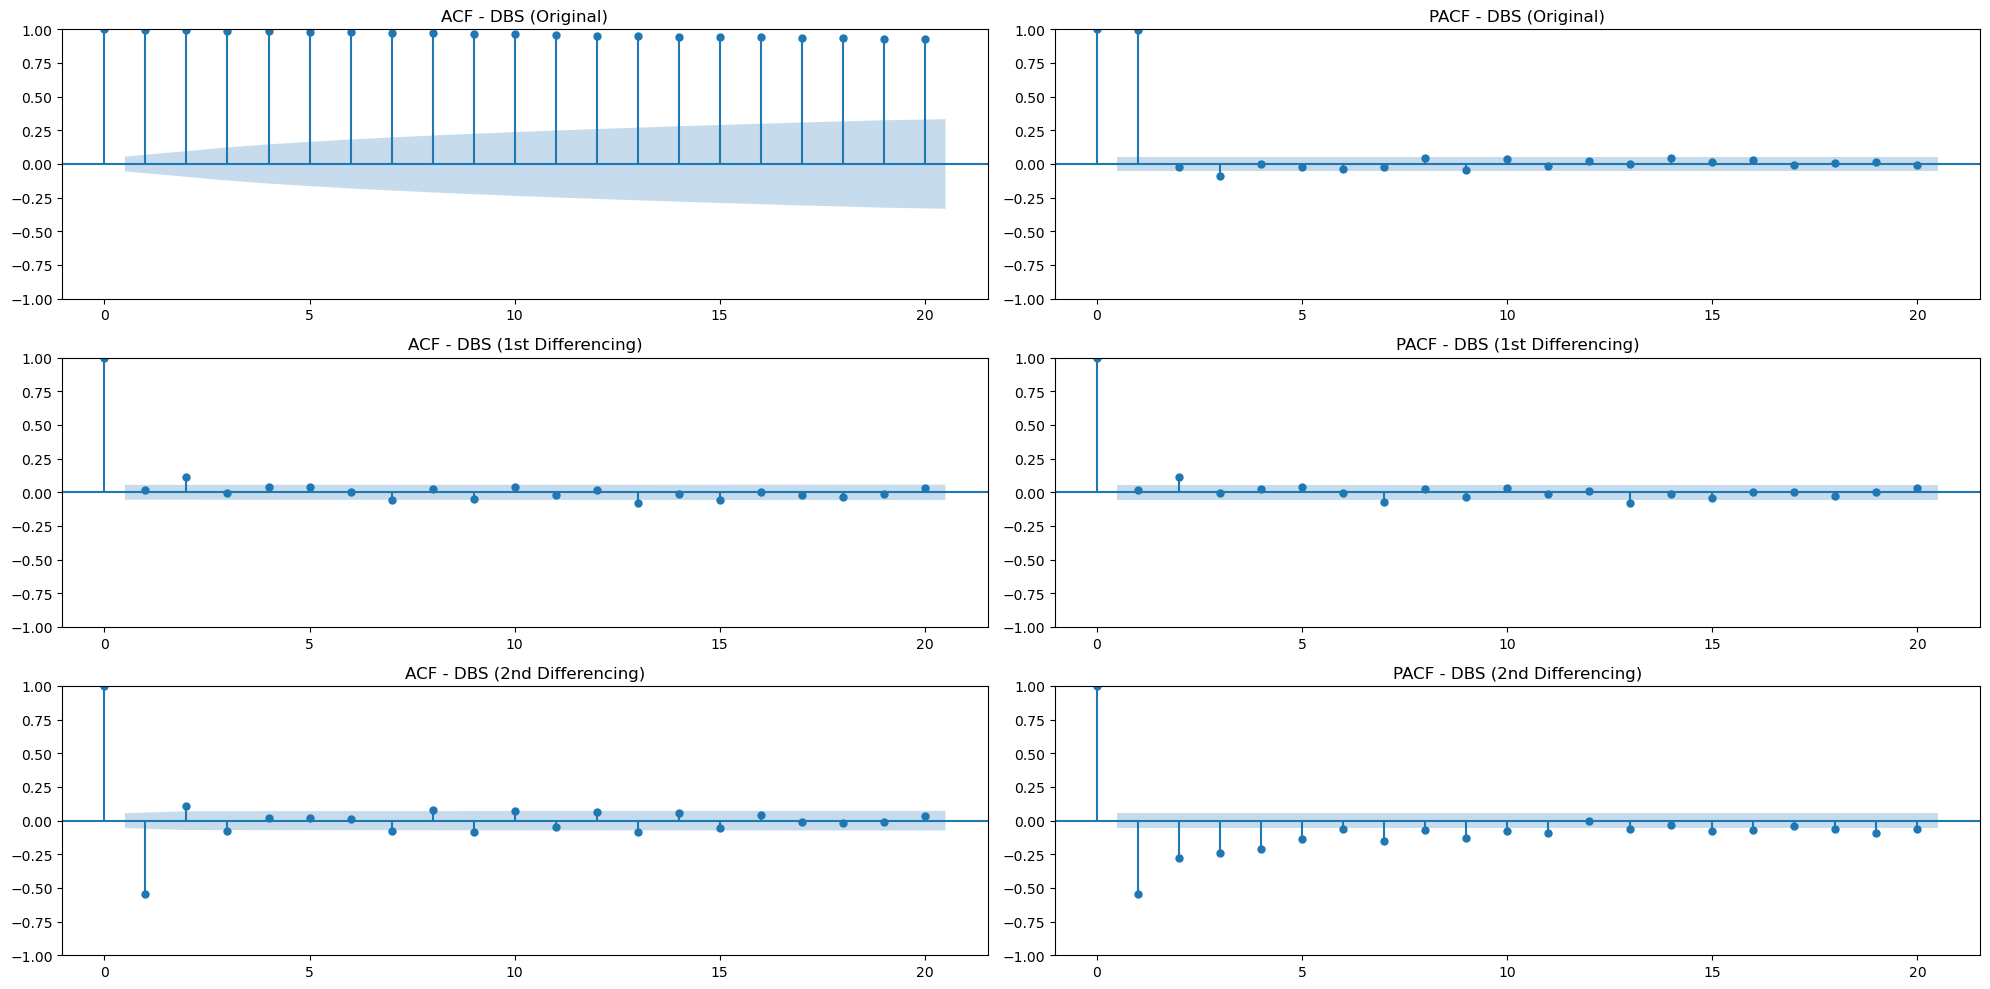

In [18]:
# Iterate over each stock column
for stock in df.columns:
    fig, ax = plt.subplots(3, 2, figsize=(20, 10), tight_layout=True)
    
    # Original series
    plot_acf(df[stock], lags=20, ax=ax[0, 0])
    plot_pacf(df[stock], lags=20, ax=ax[0, 1])
    ax[0, 0].set_title(f"ACF - {stock} (Original)")
    ax[0, 1].set_title(f"PACF - {stock} (Original)")

    # First-order differencing
    plot_acf(df[stock].diff().dropna(), lags=20, ax=ax[1, 0])
    plot_pacf(df[stock].diff().dropna(), lags=20, ax=ax[1, 1])
    ax[1, 0].set_title(f"ACF - {stock} (1st Differencing)")
    ax[1, 1].set_title(f"PACF - {stock} (1st Differencing)")

    # Second-order differencing
    plot_acf(df[stock].diff().diff().dropna(), lags=20, ax=ax[2, 0])
    plot_pacf(df[stock].diff().diff().dropna(), lags=20, ax=ax[2, 1])
    ax[2, 0].set_title(f"ACF - {stock} (2nd Differencing)")
    ax[2, 1].set_title(f"PACF - {stock} (2nd Differencing)")

    plt.show()

___
# Splitting Data
___

In [19]:
# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2023-06-30'  # End one day before the start of the test set
test_start_date = '2023-07-01'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

I defined the start and end dates for my training and test sets. This ensures that my training and test periods are distinct and do not overlap, which is important for evaluating the performance of my time series forecasting models.

___
# Holt Winter’s Seasonal Smoothing model
___

### 1. Daily Stock Price - Before Hyperparameter Tuning 

Training set shape: (1734, 3)
Test set shape: (90, 3)


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


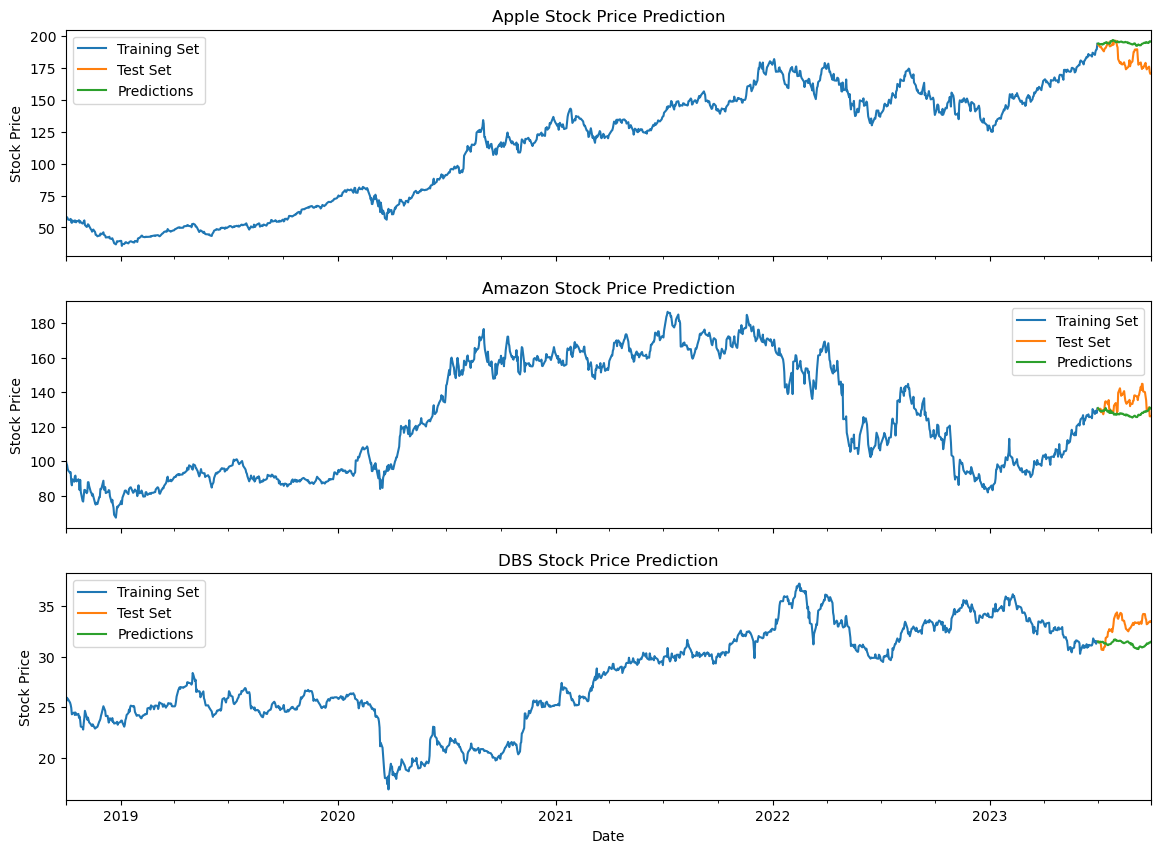

Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Daily):
Apple Stock MAPE: 6.01%
Amazon Stock MAPE: 5.03%
DBS Stock MAPE: 5.37%


In [20]:
# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]


# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Iterate over each stock column
for stock in df_daily.columns:
    # Fit the Holt-Winters Exponential Smoothing model
    model = HWES(train_data[stock], seasonal_periods=len(test_data), trend='add', seasonal='add', damped_trend=True, freq='D')
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))  # Adjust the number of steps
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Apple stock
train_data['Apple'].plot(ax=ax[0], label='Training Set')
test_data['Apple'].plot(ax=ax[0], label='Test Set')
predictions['Apple'].plot(ax=ax[0], label='Predictions')
ax[0].set_title('Apple Stock Price Prediction')
ax[0].set_ylabel('Stock Price')
ax[0].set_xlabel('Date')
ax[0].legend()

# Amazon stock
train_data['Amazon'].plot(ax=ax[1], label='Training Set')
test_data['Amazon'].plot(ax=ax[1], label='Test Set')
predictions['Amazon'].plot(ax=ax[1], label='Predictions')
ax[1].set_title('Amazon Stock Price Prediction')
ax[1].set_ylabel('Stock Price')
ax[1].set_xlabel('Date')
ax[1].legend()

# DBS stock
train_data['DBS'].plot(ax=ax[2], label='Training Set')
test_data['DBS'].plot(ax=ax[2], label='Test Set')
predictions['DBS'].plot(ax=ax[2], label='Predictions')
ax[2].set_title('DBS Stock Price Prediction')
ax[2].set_ylabel('Stock Price')
ax[2].set_xlabel('Date')
ax[2].legend()

plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Daily):")

# Print the MAPE for each stock
print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")

In the cell above, I conducted time series forecasting for the stock prices of three companies (Apple, Amazon, and DBS) using Holt-Winters Exponential Smoothing (HWES) models. It starts by filtering the dataset into training and test sets based on specified date ranges. For each stock, the code fits a HWES model to the training data and generates predictions for the test period. These predictions are then plotted alongside the actual training and test data using matplotlib, allowing for visual comparison. Mean Absolute Percentage Error (MAPE) is calculated for each stock to assess the accuracy of the predictions before any hyperparameter tuning. This evaluation provides initial insights into the performance of the forecasting models, serving as a baseline for further refinement and optimization. Overall, the code offers a comprehensive approach to time series forecasting, aiding in decision-making processes related to stock price prediction.

Observed Results: From the time series graph and the MAPE results, we can see that the forecasting of the stock prices seem to be okay as the predicted time series is close to the actual time series, especially for DBS Stock Price

### 1. Daily Stock Price - After hyperparameter tuning (Iteration of all parameters - for loop)

Index frequency: <Day>
Training set shape: (1734, 3)
Test set shape: (90, 3)


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to co

Best Hyperparameters: {'seasonal_periods': 90, 'trend': 'add', 'seasonal': 'add', 'damped_trend': True}


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


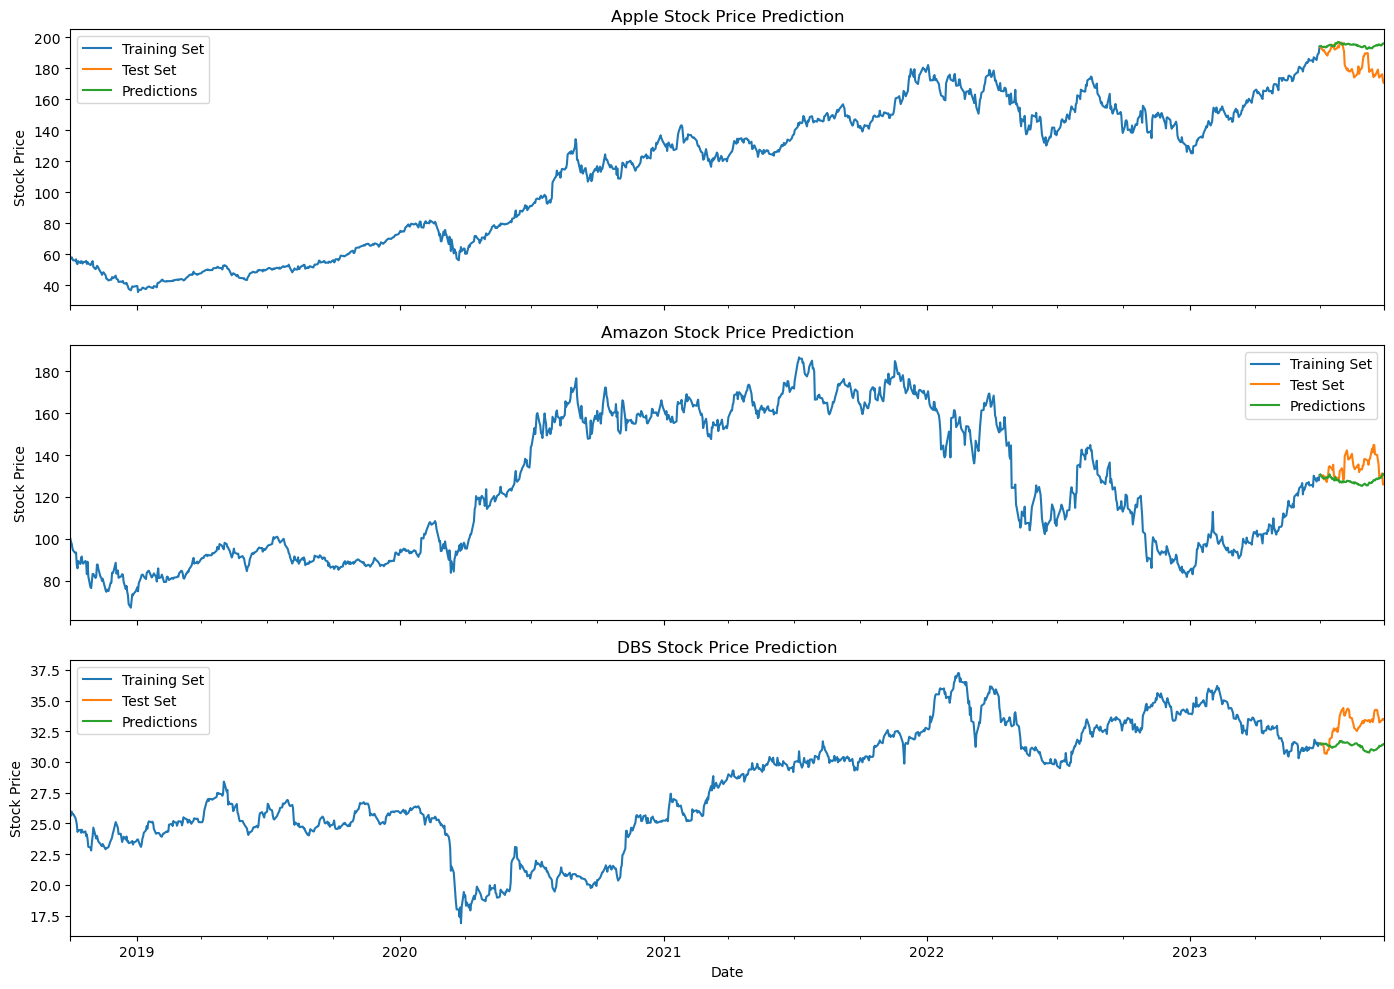

Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Daily):
Apple Stock MAPE: 6.01%
Amazon Stock MAPE: 5.03%
DBS Stock MAPE: 5.37%


In [21]:
# Check the frequency of DataFrame index
print("Index frequency:", df_daily.index.freq)

# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2023-06-30'  # End one day before the start of the test set
test_start_date = '2023-07-1'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Define the parameter grid to search
param_grid = {
    'seasonal_periods': [len(test_data)],  # daily seasonality
    'trend': ['add', 'multiplicative'],
    'seasonal': ['add', 'multiplicative'],
    'damped_trend': [True, False],
}


# Generate all possible combinations of hyperparameters
param_combinations = list(product(*param_grid.values()))

best_mape = float('inf')
best_params = None

# Iterate over all parameter combinations
for params in param_combinations:
    total_mape = 0
    for stock in df_daily.columns:
        # Fit the Holt-Winters Exponential Smoothing model using the different combinations of hyperparameters
        model = HWES(train_data[stock], freq='D', **dict(zip(param_grid.keys(), params)))
        fitted_model = model.fit(optimized=True)
    
        # Make predictions
        pred = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MAPE for this stock
        mape = mean_absolute_percentage_error(test_data[stock], pred)
        total_mape += mape
    
    # Average MAPE across all stocks
    avg_mape = total_mape / len(df_daily.columns)
    
    # Check if this combination is the best so far
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_params = params

print("Best Hyperparameters:", dict(zip(param_grid.keys(), best_params)))

# Now fit the model with the best hyperparameters
predictions = pd.DataFrame()
for stock in df_daily.columns:
    # Fit the Holt-Winters Exponential Smoothing model with the best hyperparameters
    model = HWES(train_data[stock], freq='D', **dict(zip(param_grid.keys(), best_params)))
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(len(df_daily.columns), 1, figsize=(14, 10), sharex=True)

for i, stock in enumerate(df_daily.columns):
    train_data[stock].plot(ax=ax[i], label='Training Set')
    test_data[stock].plot(ax=ax[i], label='Test Set')
    predictions[stock].plot(ax=ax[i], label='Predictions')
    ax[i].set_title(f'{stock} Stock Price Prediction')
    ax[i].set_ylabel('Stock Price')
    ax[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning
print("Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Daily):")
for stock in df_daily.columns:
    mape = mean_absolute_percentage_error(test_data[stock], predictions[stock])
    print(f"{stock} Stock MAPE: {mape * 100:.2f}%")

For the cell above, it performs time series forecasting using Holt-Winters Exponential Smoothing (HWES) with hyperparameter tuning. It first filters the data into training and test sets based on specified date ranges. Then, it defines a parameter grid for HWES hyperparameters and searches for the best combination using the mean absolute percentage error (MAPE) metric. After finding the best parameters, it fits the HWES model and generates predictions for each stock. Finally, it plots the predictions against the actual test data and calculates the MAPE for each stock. This process allows for accurate forecasting of stock prices while optimizing HWES parameters for each stock

Observations: We can see that there is no improvement in the MAPE score, perhaps due to short period of forecasting or randomness in the stock price which cannot be predicted.

### 1. Daily Stock Price - Before Hyperparameter Tuning (Longer forecasting periods)

Training set shape: (1369, 3)
Test set shape: (455, 3)


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


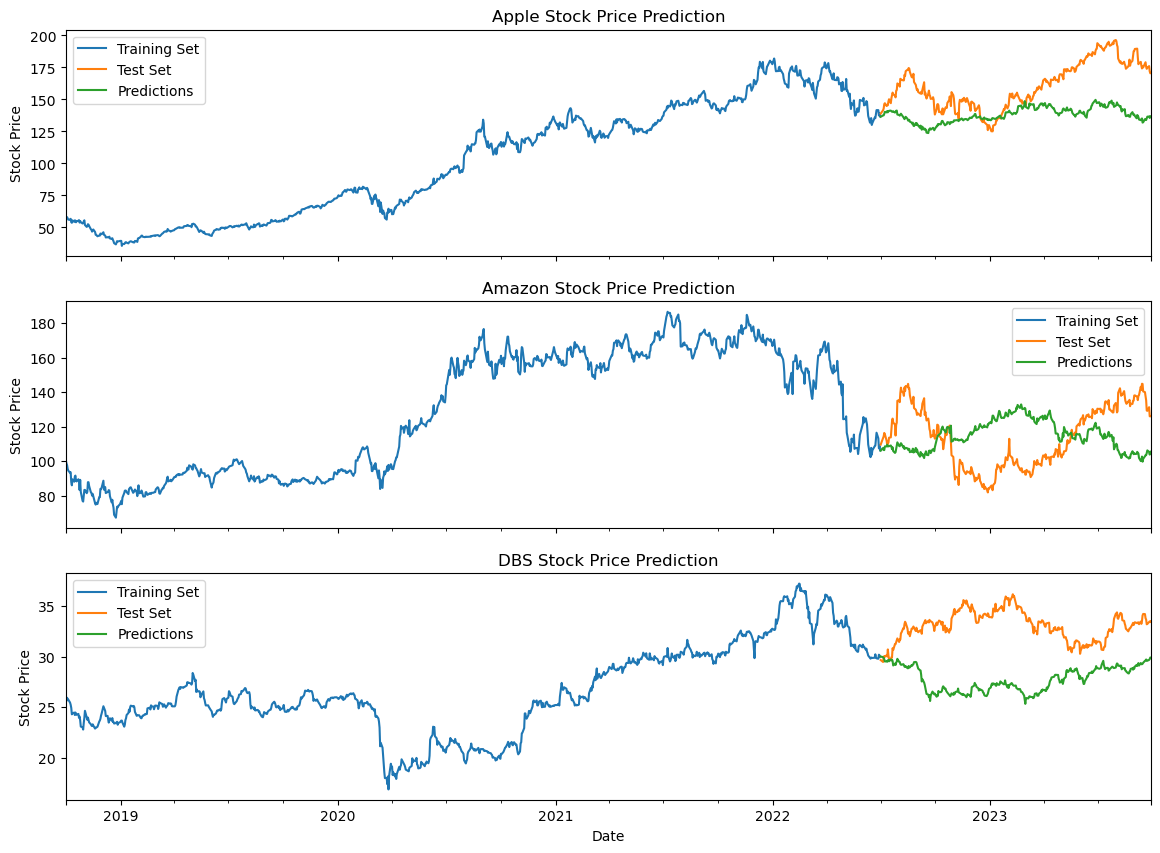

Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Daily):
Apple Stock MAPE: 13.68%
Amazon Stock MAPE: 19.44%
DBS Stock MAPE: 15.63%


In [22]:
# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2022-06-30'  # End one day before the start of the test set
test_start_date = '2022-07-1'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]


# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Iterate over each stock column
for stock in df_daily.columns:
    # Fit the Holt-Winters Exponential Smoothing model
    model = HWES(train_data[stock], seasonal_periods=len(test_data), trend='add', seasonal='add', damped_trend=True, freq='D')
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))  # Adjust the number of steps
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Apple stock
train_data['Apple'].plot(ax=ax[0], label='Training Set')
test_data['Apple'].plot(ax=ax[0], label='Test Set')
predictions['Apple'].plot(ax=ax[0], label='Predictions')
ax[0].set_title('Apple Stock Price Prediction')
ax[0].set_ylabel('Stock Price')
ax[0].set_xlabel('Date')
ax[0].legend()

# Amazon stock
train_data['Amazon'].plot(ax=ax[1], label='Training Set')
test_data['Amazon'].plot(ax=ax[1], label='Test Set')
predictions['Amazon'].plot(ax=ax[1], label='Predictions')
ax[1].set_title('Amazon Stock Price Prediction')
ax[1].set_ylabel('Stock Price')
ax[1].set_xlabel('Date')
ax[1].legend()

# DBS stock
train_data['DBS'].plot(ax=ax[2], label='Training Set')
test_data['DBS'].plot(ax=ax[2], label='Test Set')
predictions['DBS'].plot(ax=ax[2], label='Predictions')
ax[2].set_title('DBS Stock Price Prediction')
ax[2].set_ylabel('Stock Price')
ax[2].set_xlabel('Date')
ax[2].legend()

plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Daily):")

# Print the MAPE for each stock
print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")

### 1. Daily Stock Price - After hyperparameter Tuning (Longer forecasting periods)

Index frequency: <Day>
Training set shape: (1369, 3)
Test set shape: (455, 3)


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to co

Best Hyperparameters: {'seasonal_periods': 455, 'trend': 'add', 'seasonal': 'multiplicative', 'damped_trend': False}


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


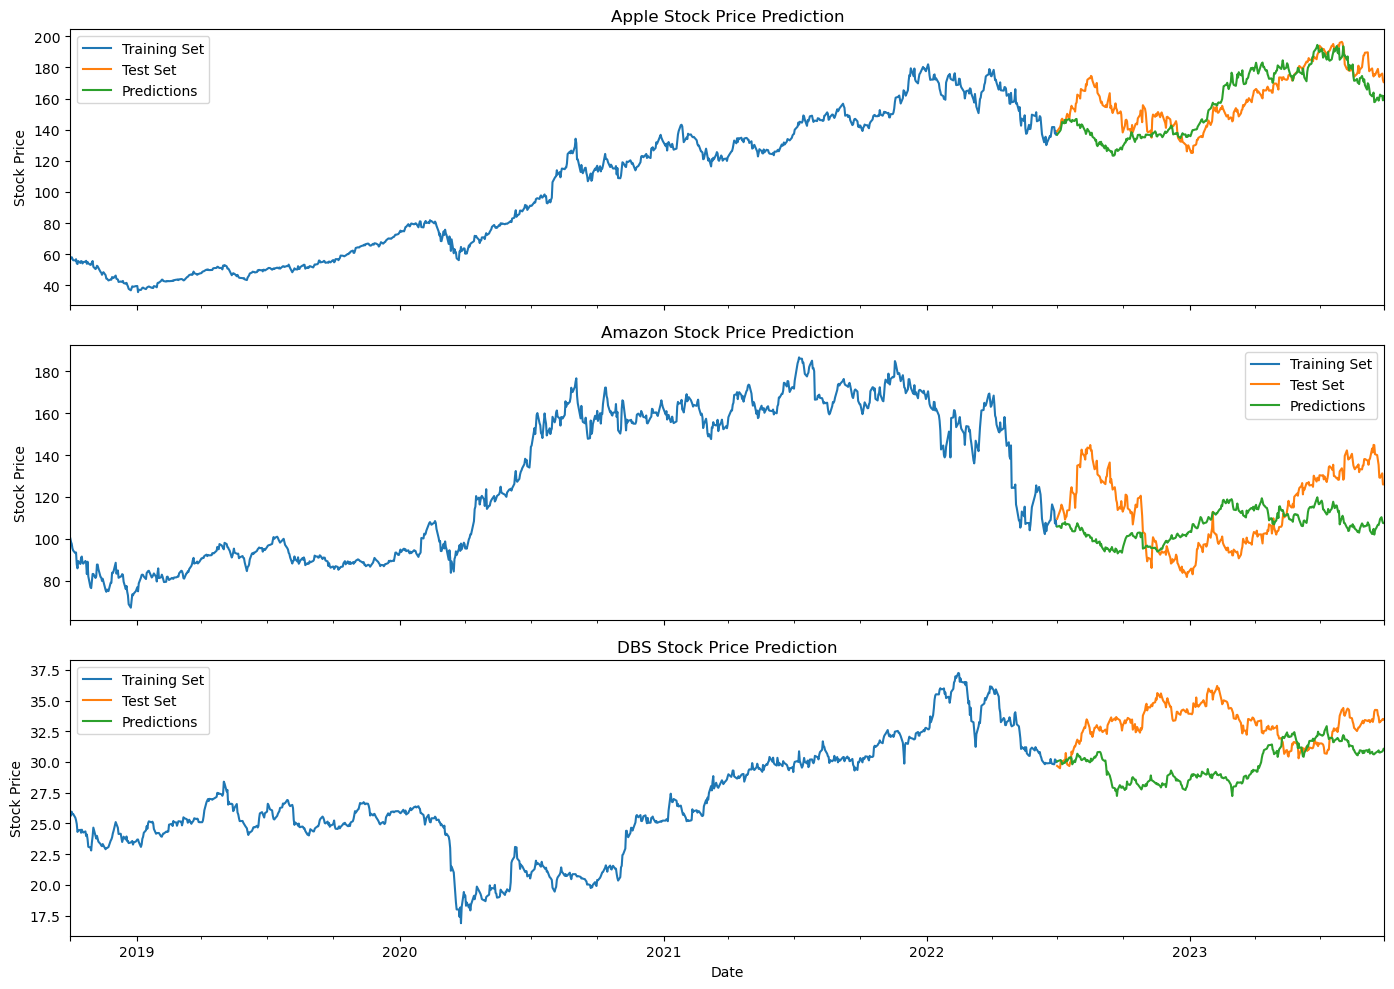

Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Daily):
Apple Stock MAPE: 7.26%
Amazon Stock MAPE: 14.83%
DBS Stock MAPE: 10.10%


In [23]:
# Check the frequency of DataFrame index
print("Index frequency:", df_daily.index.freq)

# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2022-06-30'  # End one day before the start of the test set
test_start_date = '2022-07-1'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Define the parameter grid to search
param_grid = {
    'seasonal_periods': [len(test_data)],  # daily seasonality
    'trend': ['add', 'multiplicative'],
    'seasonal': ['add', 'multiplicative'],
    'damped_trend': [True, False],
}


# Generate all possible combinations of hyperparameters
param_combinations = list(product(*param_grid.values()))

best_mape = float('inf')
best_params = None

# Iterate over all parameter combinations
for params in param_combinations:
    total_mape = 0
    for stock in df_daily.columns:
        # Fit the Holt-Winters Exponential Smoothing model using the different combinations of hyperparameters
        model = HWES(train_data[stock], freq='D', **dict(zip(param_grid.keys(), params)))
        fitted_model = model.fit(optimized=True)
    
        # Make predictions
        pred = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MAPE for this stock
        mape = mean_absolute_percentage_error(test_data[stock], pred)
        total_mape += mape
    
    # Average MAPE across all stocks
    avg_mape = total_mape / len(df_daily.columns)
    
    # Check if this combination is the best so far
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_params = params

print("Best Hyperparameters:", dict(zip(param_grid.keys(), best_params)))

# Now fit the model with the best hyperparameters
predictions = pd.DataFrame()
for stock in df_daily.columns:
    # Fit the Holt-Winters Exponential Smoothing model with the best hyperparameters
    model = HWES(train_data[stock], freq='D', **dict(zip(param_grid.keys(), best_params)))
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(len(df_daily.columns), 1, figsize=(14, 10), sharex=True)

for i, stock in enumerate(df_daily.columns):
    train_data[stock].plot(ax=ax[i], label='Training Set')
    test_data[stock].plot(ax=ax[i], label='Test Set')
    predictions[stock].plot(ax=ax[i], label='Predictions')
    ax[i].set_title(f'{stock} Stock Price Prediction')
    ax[i].set_ylabel('Stock Price')
    ax[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning
print("Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Daily):")
for stock in df_daily.columns:
    mape = mean_absolute_percentage_error(test_data[stock], predictions[stock])
    print(f"{stock} Stock MAPE: {mape * 100:.2f}%")

### 2. Change back the start and end dates

In [24]:
# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2023-06-30'  # End one day before the start of the test set
test_start_date = '2023-07-1'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

### 2. Weekly Stock Price - Before Hyperparameter Tuning

Training set shape: (247, 3)
Test set shape: (13, 3)


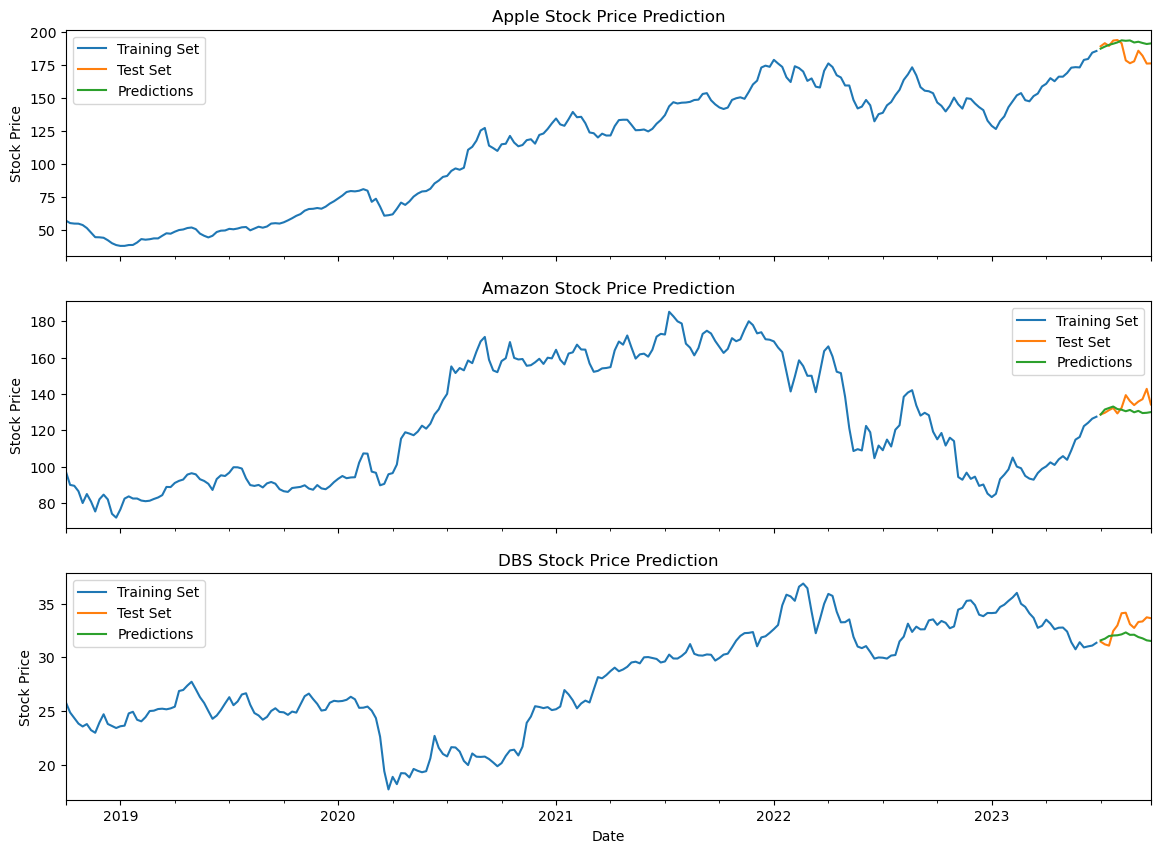

Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Weekly):
Apple Stock MAPE: 4.48%
Amazon Stock MAPE: 3.09%
DBS Stock MAPE: 3.59%


In [25]:
# Filter your DataFrame based on the specified date ranges
train_data = df_weekly[(df_weekly.index >= train_start_date) & (df_weekly.index <= train_end_date)]
test_data = df_weekly[(df_weekly.index >= test_start_date) & (df_weekly.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Predict the stock price for the next 365 days
# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Iterate over each stock column
for stock in df_weekly.columns:
    # Fit the Holt-Winters Exponential Smoothing model
    model = HWES(train_data[stock], seasonal_periods=len(test_data), trend='add', seasonal='add', damped_trend=True, freq='W')
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))  # Adjust the number of steps
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Apple stock
train_data['Apple'].plot(ax=ax[0], label='Training Set')
test_data['Apple'].plot(ax=ax[0], label='Test Set')
predictions['Apple'].plot(ax=ax[0], label='Predictions')
ax[0].set_title('Apple Stock Price Prediction')
ax[0].set_ylabel('Stock Price')
ax[0].legend()

# Amazon stock
train_data['Amazon'].plot(ax=ax[1], label='Training Set')
test_data['Amazon'].plot(ax=ax[1], label='Test Set')
predictions['Amazon'].plot(ax=ax[1], label='Predictions')
ax[1].set_title('Amazon Stock Price Prediction')
ax[1].set_ylabel('Stock Price')
ax[1].legend()

# DBS stock
train_data['DBS'].plot(ax=ax[2], label='Training Set')
test_data['DBS'].plot(ax=ax[2], label='Test Set')
predictions['DBS'].plot(ax=ax[2], label='Predictions')
ax[2].set_title('DBS Stock Price Prediction')
ax[2].set_ylabel('Stock Price')
ax[2].legend()

plt.xlabel('Date')
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Weekly):")

print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")

### 2. Weekly Stock Price - After Hyperparameter Tuning (Iteration of all parameters - for loop)

Training set shape: (247, 3)
Test set shape: (13, 3)


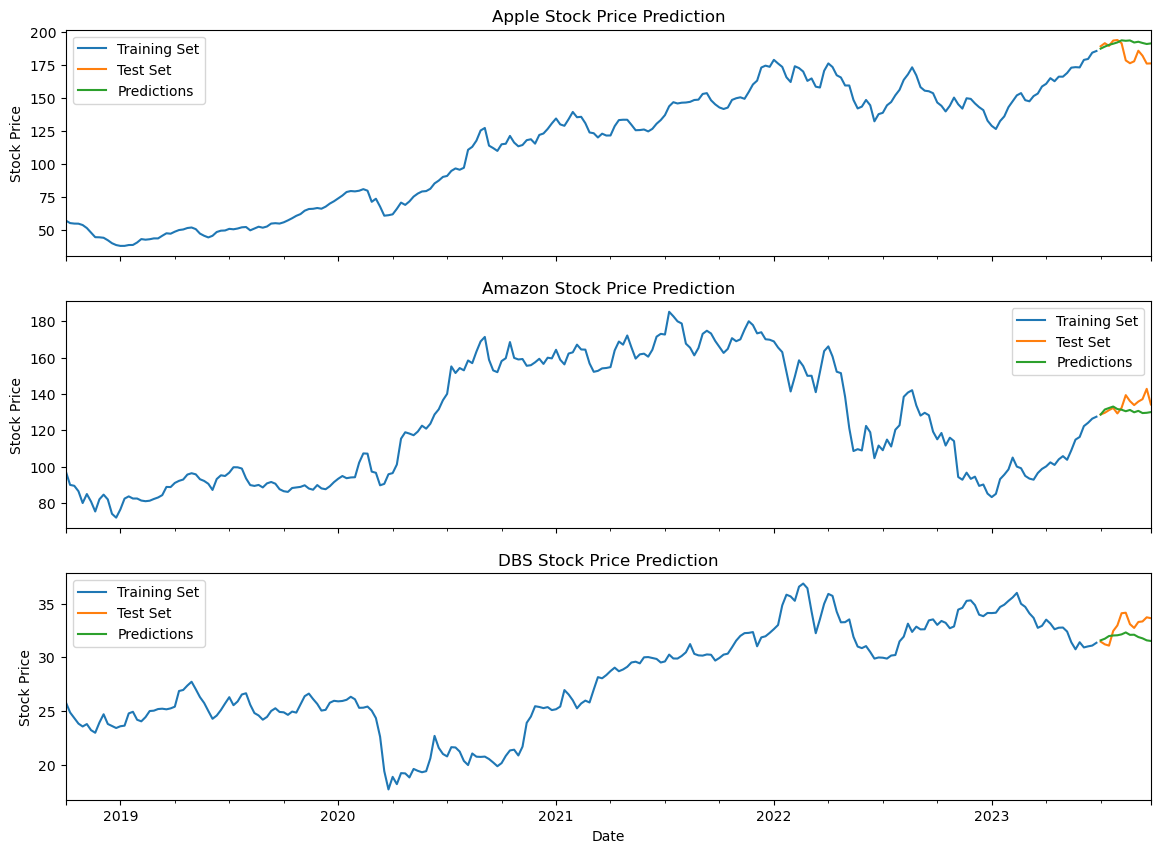

Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Weekly):
Apple Stock MAPE: 4.48%
Amazon Stock MAPE: 3.09%
DBS Stock MAPE: 3.59%


In [26]:
# Filter your DataFrame based on the specified date ranges
train_data = df_weekly[(df_weekly.index >= train_start_date) & (df_weekly.index <= train_end_date)]
test_data = df_weekly[(df_weekly.index >= test_start_date) & (df_weekly.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Predict the stock price for the next 52 weeks (1 year)
# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Iterate over each stock column
for stock in df_weekly.columns:
    # Fit the Holt-Winters Exponential Smoothing model
    model = HWES(train_data[stock], seasonal_periods=len(test_data), trend='add', seasonal='add', damped_trend=True, freq='W')
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Apple stock
train_data['Apple'].plot(ax=ax[0], label='Training Set')
test_data['Apple'].plot(ax=ax[0], label='Test Set')
predictions['Apple'].plot(ax=ax[0], label='Predictions')
ax[0].set_title('Apple Stock Price Prediction')
ax[0].set_ylabel('Stock Price')
ax[0].legend()

# Amazon stock
train_data['Amazon'].plot(ax=ax[1], label='Training Set')
test_data['Amazon'].plot(ax=ax[1], label='Test Set')
predictions['Amazon'].plot(ax=ax[1], label='Predictions')
ax[1].set_title('Amazon Stock Price Prediction')
ax[1].set_ylabel('Stock Price')
ax[1].legend()

# DBS stock
train_data['DBS'].plot(ax=ax[2], label='Training Set')
test_data['DBS'].plot(ax=ax[2], label='Test Set')
predictions['DBS'].plot(ax=ax[2], label='Predictions')
ax[2].set_title('DBS Stock Price Prediction')
ax[2].set_ylabel('Stock Price')
ax[2].legend()

plt.xlabel('Date')
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Weekly):")

# Print the MAPE for each stock
print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")


### 3. Monthly Stock Price - Before Hyperparameter Tuning

Training set shape: (57, 3)
Test set shape: (2, 3)


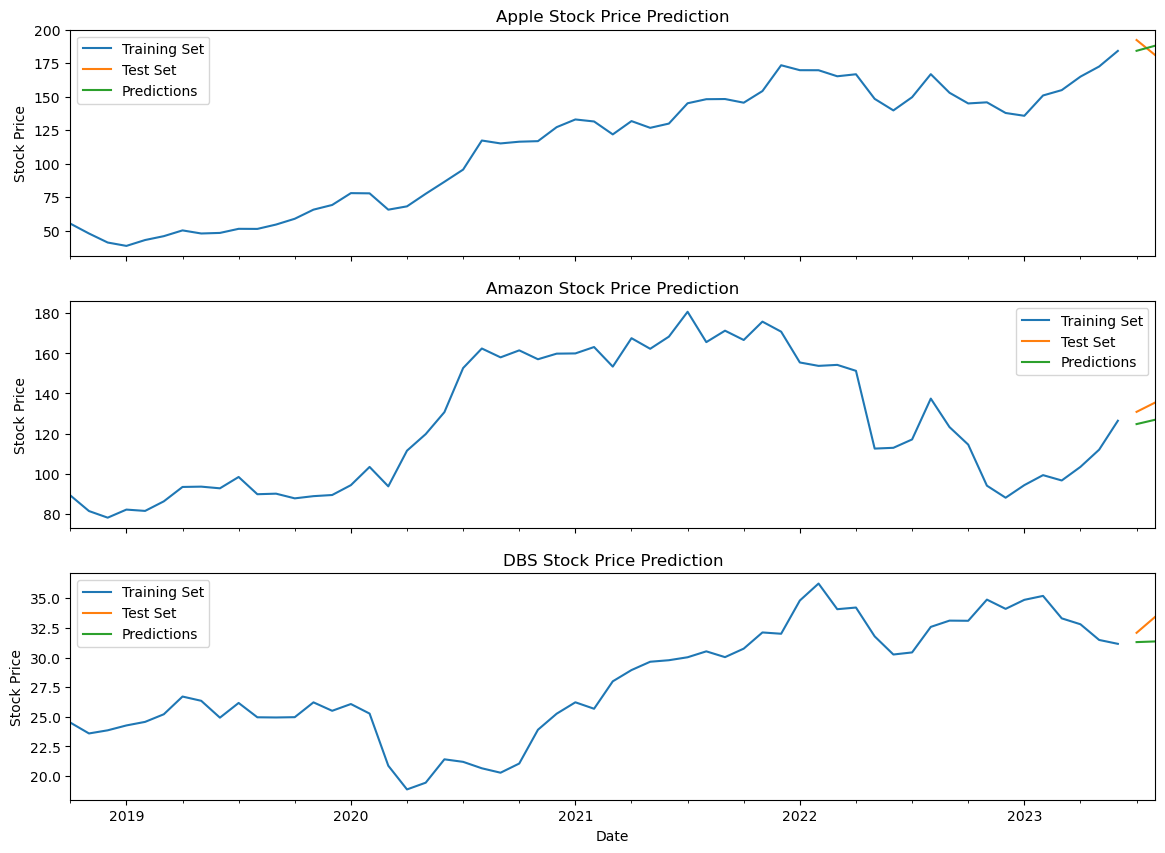

Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Monthly):
Apple Stock MAPE: 4.05%
Amazon Stock MAPE: 5.51%
DBS Stock MAPE: 4.34%


In [27]:
# Filter your DataFrame based on the specified date ranges
train_data = df_monthly[(df_monthly.index >= train_start_date) & (df_monthly.index <= train_end_date)]
test_data = df_monthly[(df_monthly.index >= test_start_date) & (df_monthly.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Predict the stock price for the next 365 days
# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Iterate over each stock column
for stock in df_monthly.columns:
    # Fit the Holt-Winters Exponential Smoothing model
    model = HWES(train_data[stock], seasonal_periods=len(test_data), trend='add', seasonal='add', damped_trend=True, freq='M')
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))  # Adjust the number of steps
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Apple stock
train_data['Apple'].plot(ax=ax[0], label='Training Set')
test_data['Apple'].plot(ax=ax[0], label='Test Set')
predictions['Apple'].plot(ax=ax[0], label='Predictions')
ax[0].set_title('Apple Stock Price Prediction')
ax[0].set_ylabel('Stock Price')
ax[0].legend()

# Amazon stock
train_data['Amazon'].plot(ax=ax[1], label='Training Set')
test_data['Amazon'].plot(ax=ax[1], label='Test Set')
predictions['Amazon'].plot(ax=ax[1], label='Predictions')
ax[1].set_title('Amazon Stock Price Prediction')
ax[1].set_ylabel('Stock Price')
ax[1].legend()

# DBS stock
train_data['DBS'].plot(ax=ax[2], label='Training Set')
test_data['DBS'].plot(ax=ax[2], label='Test Set')
predictions['DBS'].plot(ax=ax[2], label='Predictions')
ax[2].set_title('DBS Stock Price Prediction')
ax[2].set_ylabel('Stock Price')
ax[2].legend()

plt.xlabel('Date')
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock before hyperparameter tuning (Monthly):")

# Print the MAPE for each stock
print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")

### 3. Monthly Stock Price - After Hyperparameter Tuning (Iteration of all parameters - for loop)

Index frequency: <MonthEnd>
Training set shape: (57, 3)
Test set shape: (2, 3)
Best Hyperparameters: {'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 2, 'trend': 'multiplicative'}


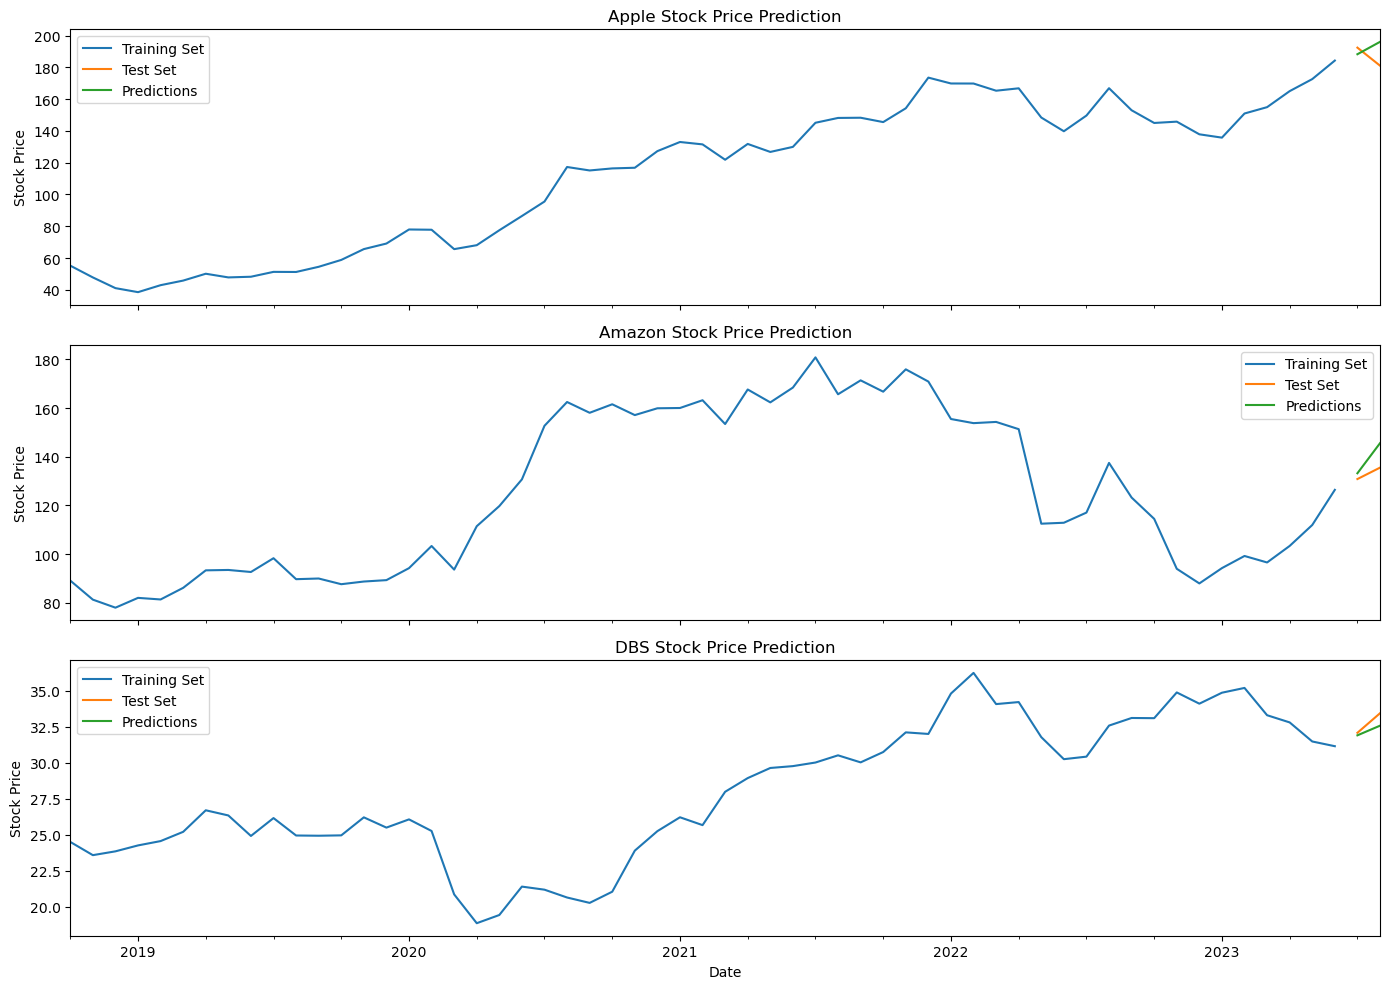

Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Monthly):
Apple Stock MAPE: 5.21%
Amazon Stock MAPE: 4.61%
DBS Stock MAPE: 1.56%


In [28]:
# Check the frequency of DataFrame index
print("Index frequency:", df_monthly.index.freq)

# Filter your DataFrame based on the specified date ranges
train_data = df_monthly[(df_monthly.index >= train_start_date) & (df_monthly.index <= train_end_date)]
test_data = df_monthly[(df_monthly.index >= test_start_date) & (df_monthly.index <= test_end_date)]

# Check the shape of the training and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

# Define the parameter grid to search
param_grid = {
    'seasonal_periods': [len(test_data)],  # Assuming monthly seasonality
    'trend': ['add', 'multiplicative'],
    'seasonal': ['add', 'multiplicative'],
    'damped_trend': [True, False]
}

param_combinations = list(ParameterGrid(param_grid))
best_mape = float('inf')
best_params = None

# Iterate over all parameter combinations
for params in param_combinations:
    total_mape = 0
    for stock in df_monthly.columns:
        # Fit the Holt-Winters Exponential Smoothing model
        model = HWES(train_data[stock], freq='M', **params)
        fitted_model = model.fit(optimized=True)
    
        # Make predictions
        pred = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MAPE for this stock
        mape = mean_absolute_percentage_error(test_data[stock], pred)
        total_mape += mape
    
    # Average MAPE across all stocks
    avg_mape = total_mape / len(df_monthly.columns)
    
    # Check if this combination is the best so far
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_params = params

print("Best Hyperparameters:", best_params)

# Now fit the model with the best hyperparameters
predictions = pd.DataFrame()
for stock in df_monthly.columns:
    # Fit the Holt-Winters Exponential Smoothing model with the best hyperparameters
    model = HWES(train_data[stock], freq='M', **best_params)
    fitted_model = model.fit(optimized=True)
    
    # Make predictions
    pred = fitted_model.forecast(steps=len(test_data))
    predictions[stock] = pred

# Plot the predictions
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

for i, stock in enumerate(df_monthly.columns):
    train_data[stock].plot(ax=ax[i], label='Training Set')
    test_data[stock].plot(ax=ax[i], label='Test Set')
    predictions[stock].plot(ax=ax[i], label='Predictions')
    ax[i].set_title(f'{stock} Stock Price Prediction')
    ax[i].set_ylabel('Stock Price')
    ax[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning
print("Mean Absolute Percentage Error (MAPE) for each stock after hyperparameter tuning (Monthly):")
for stock in df_monthly.columns:
    mape = mean_absolute_percentage_error(test_data[stock], predictions[stock])
    print(f"{stock} Stock MAPE: {mape * 100:.2f}%")

___
# ARIMA
___

### Baseline ARIMA - Before tuning (Use order = (1,1,1))

Stock: Apple, MAPE: 5.78%, AIC: 6991.83, BIC: 7008.20


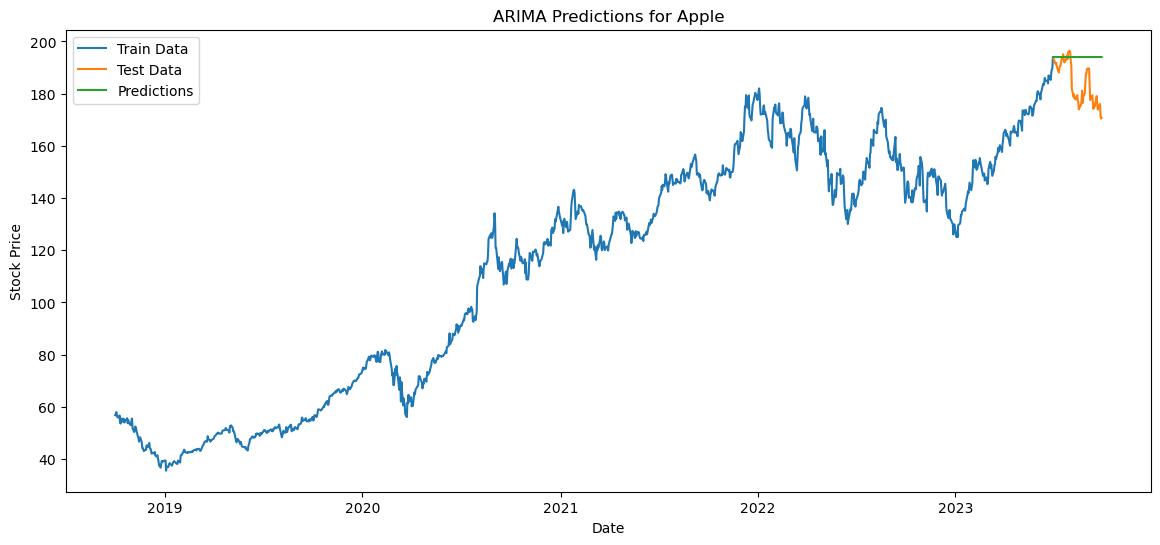

Stock: Amazon, MAPE: 3.49%, AIC: 7662.42, BIC: 7678.80


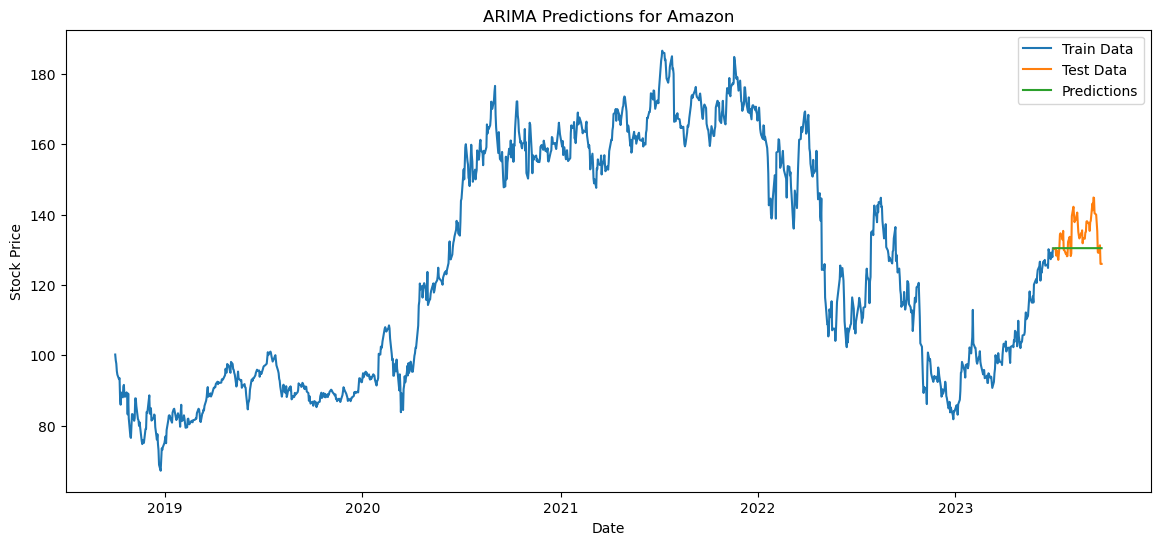

Stock: DBS, MAPE: 4.78%, AIC: 241.27, BIC: 257.64


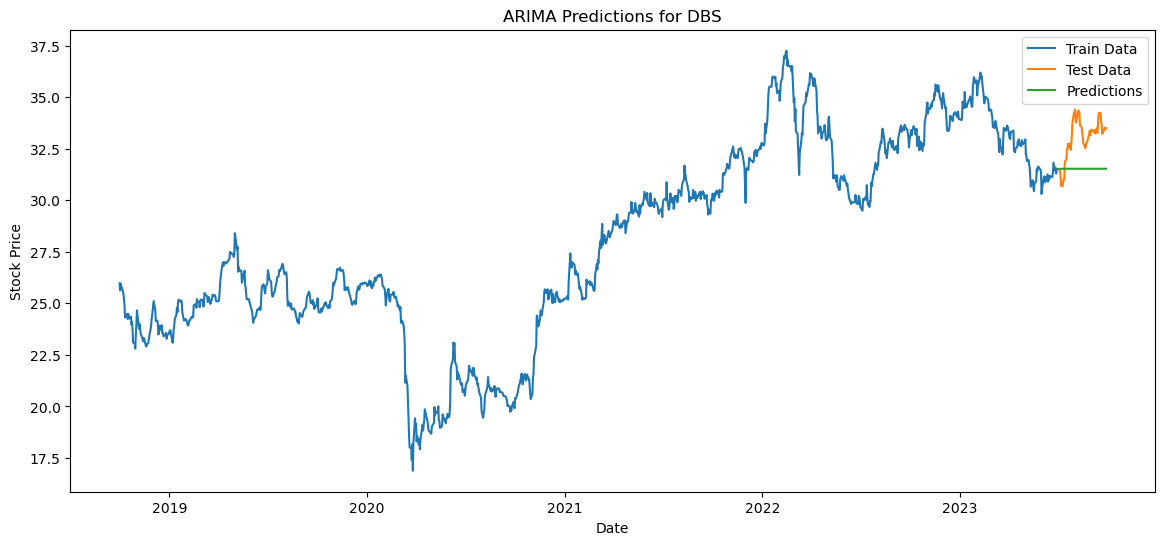

In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2023-06-30'  # End one day before the start of the test set
test_start_date = '2023-07-01'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]

# Create a new DataFrame to store the predictions, MAPE, AIC, and BIC
results = pd.DataFrame(columns=['MAPE', 'AIC', 'BIC'])

# Iterate over each stock column
for stock in df_daily.columns:
    try:
        # Fit ARIMA model with order (1, 1, 1)
        arima_model = ARIMA(train_data[stock], order=(1, 1, 1))
        arima_fit = arima_model.fit()

        # Use the model to make predictions
        pred_out_sample = arima_fit.forecast(steps=len(test_data))

        # Calculate MAPE for the stock
        mape = mean_absolute_percentage_error(test_data[stock], pred_out_sample)

        # Calculate AIC and BIC for the model
        aic = arima_fit.aic
        bic = arima_fit.bic

        # Store results
        results.loc[stock] = [mape, aic, bic]

        # Print results
        print(f"Stock: {stock}, MAPE: {mape*100:.2f}%, AIC: {aic:.2f}, BIC: {bic:.2f}")

        # Plot the time series with predictions and test data
        plt.figure(figsize=(14, 6))
        plt.plot(train_data.index, train_data[stock], label='Train Data')
        plt.plot(test_data.index, test_data[stock], label='Test Data')
        plt.plot(test_data.index, pred_out_sample, label='Predictions')
        plt.title(f"ARIMA Predictions for {stock}")
        plt.xlabel("Date")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error occurred for {stock}: {e}")

This code performs time series forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model for each stock in the DataFrame. It first filters the data into training and test sets based on specified date ranges. Then, it iterates over each stock column, fitting an ARIMA model with order (1, 1, 1) to the training data. The model is then used to make predictions for the test data. It calculates the Mean Absolute Percentage Error (MAPE), Akaike Information Criterion (AIC), and Bayesian Information Criterion (BIC) for each stock model and stores the results. Finally, it plots the time series data along with the predictions and test data for visualization and evaluation.

### Best ARIMA Model - Hyperparameter Tuning (Best p,d,q)

c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Best ARIMA Model for Apple: Order=(2, 0, 3), AIC=7010.26, BIC=7048.47


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model for Amazon: Order=(1, 1, 1), AIC=7662.42, BIC=7678.80


c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\angmi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model for DBS: Order=(3, 1, 3), AIC=238.74, BIC=276.94


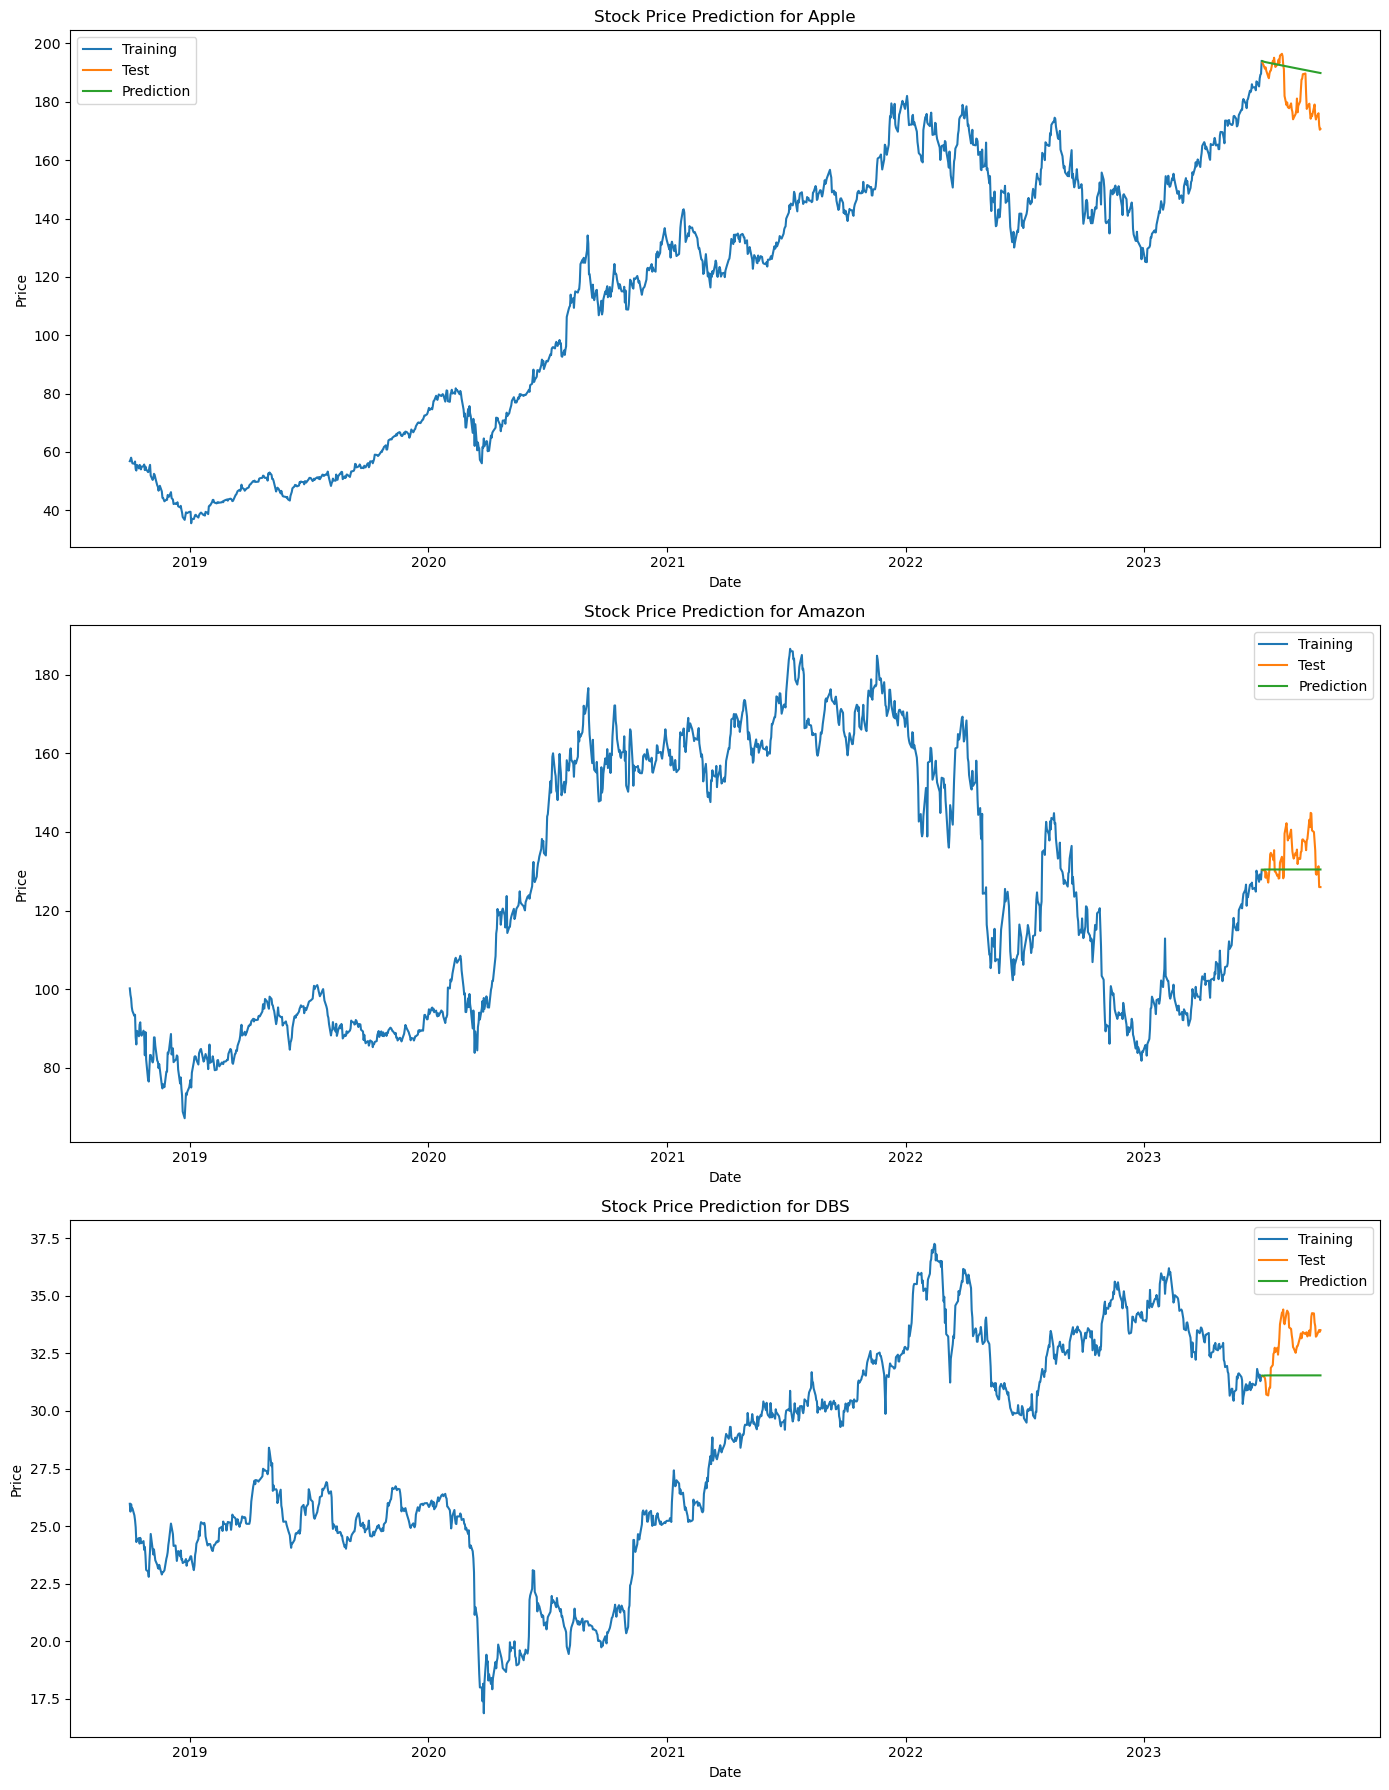

Mean Absolute Percentage Error (MAPE) for each stock after ARIMA (Daily):
Apple Stock MAPE: 4.71%
Amazon Stock MAPE: 3.49%
DBS Stock MAPE: 4.74%


In [30]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import itertools
import matplotlib.pyplot as plt

# Define the start and end dates for your training and test sets
train_start_date = '2018-10-01'
train_end_date = '2023-06-30'  # End one day before the start of the test set
test_start_date = '2023-07-01'  # Start one day after the end of the training set
test_end_date = '2023-09-28'

# Filter your DataFrame based on the specified date ranges
train_data = df_daily[(df_daily.index >= train_start_date) & (df_daily.index <= train_end_date)]
test_data = df_daily[(df_daily.index >= test_start_date) & (df_daily.index <= test_end_date)]

# Create a new DataFrame to store the predictions
predictions = pd.DataFrame()

# Define ranges for p, d, and q
p_values = range(4)  # autoregressive order
d_values = range(2)  # differencing order
q_values = range(4)  # moving average order

# Iterate over each stock column
fig, axes = plt.subplots(nrows=len(df_daily.columns), ncols=1, figsize=(14, 6*len(df_daily.columns)))

for i, stock in enumerate(df_daily.columns):
    best_score = float('inf')
    best_cfg = None
    best_aic = float('inf')
    best_bic = float('inf')
    
    # Iterate over all combinations of p, d, and q
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            # Fit ARIMA model
            arima_model = ARIMA(train_data[stock], order=(p, d, q))
            arima_fit = arima_model.fit()

            # Calculate AIC and BIC
            aic = arima_fit.aic
            bic = arima_fit.bic

            # Use the model to make predictions
            pred_out_sample = arima_fit.forecast(steps=len(test_data))

            # Calculate MAPE
            mape = mean_absolute_percentage_error(test_data[stock], pred_out_sample)

            # Check if this model is better than the previous best model
            if mape < best_score:
                best_score = mape
                best_cfg = (p, d, q)
                best_aic = aic
                best_bic = bic
        except:
            continue

    # Fit the best ARIMA model
    best_arima_model = ARIMA(train_data[stock], order=best_cfg)
    best_arima_fit = best_arima_model.fit()

    # Use the best model to make predictions
    pred_out_sample = best_arima_fit.forecast(steps=len(test_data))
    
    # Store the predictions in the DataFrame
    predictions[stock] = pred_out_sample

    # Plot the time series data, test, and predictions
    axes[i].plot(train_data.index, train_data[stock], label='Training')
    axes[i].plot(test_data.index, test_data[stock], label='Test')
    axes[i].plot(test_data.index, pred_out_sample, label='Prediction')
    axes[i].set_title(f'Stock Price Prediction for {stock}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()

    # Print the AIC and BIC for the best model
    print(f"Best ARIMA Model for {stock}: Order={best_cfg}, AIC={best_aic:.2f}, BIC={best_bic:.2f}")

plt.tight_layout()
plt.show()

# Calculate the Mean Absolute Percentage Error (MAPE) for each stock after ARIMA
mape_apple = mean_absolute_percentage_error(test_data['Apple'], predictions['Apple'])
mape_amazon = mean_absolute_percentage_error(test_data['Amazon'], predictions['Amazon'])
mape_dbs = mean_absolute_percentage_error(test_data['DBS'], predictions['DBS'])

print("Mean Absolute Percentage Error (MAPE) for each stock after ARIMA (Daily):")

# Print the MAPE for each stock
print(f"Apple Stock MAPE: {mape_apple*100:.2f}%")
print(f"Amazon Stock MAPE: {mape_amazon*100:.2f}%")
print(f"DBS Stock MAPE: {mape_dbs*100:.2f}%")


This code automates time series forecasting using ARIMA models for multiple stocks. It divides the data, searches for the best-fitting ARIMA model, evaluates using AIC and BIC, and calculates MAPE for each stock. It then visualizes data, test sets, and predictions, streamlining model selection, evaluation, and forecasting, enhancing efficiency and accuracy in time series analysis.

Observations: After iterating over parameters to find the best models, the MAPE values improved for Apple and DBS, while remaining the same for Amazon. The updated ARIMA models also led to changes in the AIC and BIC values. For example, the best ARIMA model for Apple had an MAPE of 4.71% with AIC = 7010.26 and BIC = 7048.47, indicating a slightly better fit compared to the initial model.

___
# SARIMA
___

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from joblib import Parallel, delayed

# Assuming df_daily is your DataFrame containing daily stock prices
# Select the columns for 'Apple', 'Amazon', and 'DBS'
selected_columns = ['Apple', 'Amazon', 'DBS']
stock_data = df_daily[selected_columns]

# Define training and testing periods
train_start_date = '2018-01-01'
train_end_date = '2023-06-30'
test_start_date = '2023-07-01'
test_end_date = '2023-09-28'

# Split the data into training and testing sets
train_data = stock_data[train_start_date:train_end_date]
test_data = stock_data[test_start_date:test_end_date]

# Function to fit SARIMA model
def fit_sarima(col, train_data=train_data, seasonal_order=(1, 1, 1, 365)):
    sarima_model = SARIMAX(train_data[col], order=(1, 1, 1), seasonal_order=seasonal_order, enforce_invertibility=False)
    sarima_result = sarima_model.fit(disp=False, method='bfgs', approx_complex_step=True)
    return sarima_result

# Define SARIMA order parameters
seasonal_order = (1, 1, 1, 365)  # Assuming yearly seasonality

# Parallelize SARIMA model fitting
sarima_models = Parallel(n_jobs=-1)(delayed(fit_sarima)(col, seasonal_order=seasonal_order) for col in stock_data.columns)

# Initialize dictionaries to store results
mape_results = {}

# Calculate MAPE and make predictions
for i, col in enumerate(stock_data.columns):
    sarima_result = sarima_models[i]
    pred_out_sample = sarima_result.forecast(steps=len(test_data))
    mape = np.mean(np.abs((test_data[col] - pred_out_sample) / test_data[col])) * 100
    mape_results[col] = mape
    
    # Plot the results
    plt.figure(figsize=(14, 5))
    plt.plot(train_data[col], label='Training Data')
    plt.plot(test_data[col], label='Testing Data')
    plt.plot(test_data.index, pred_out_sample, label='SARIMA Prediction')
    plt.title(f'SARIMA Baseline Model for {col}')
    plt.legend()
    plt.show()

# Print MAPE results
for col, mape in mape_results.items():
    print(f'{col}:')
    print(f'  - MAPE: {mape:.2f}%')


### Weekly

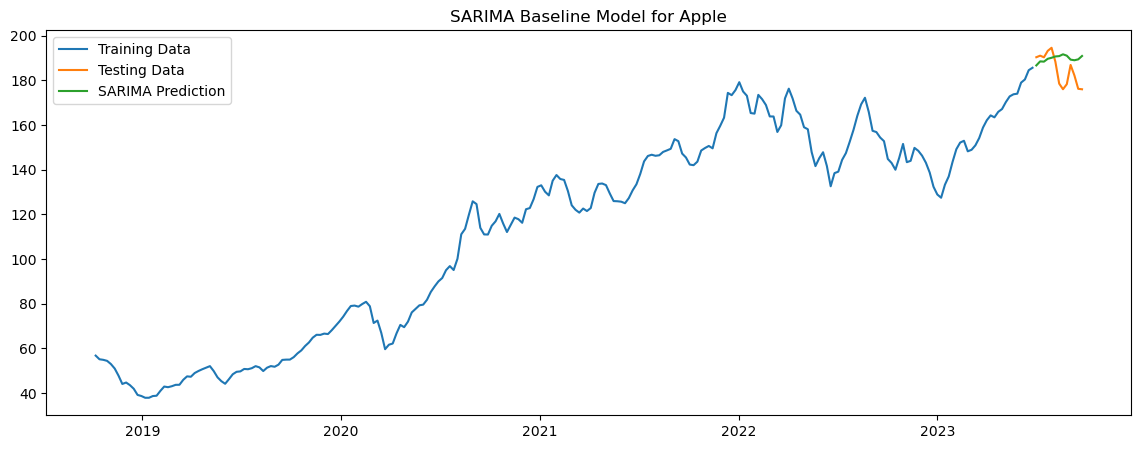

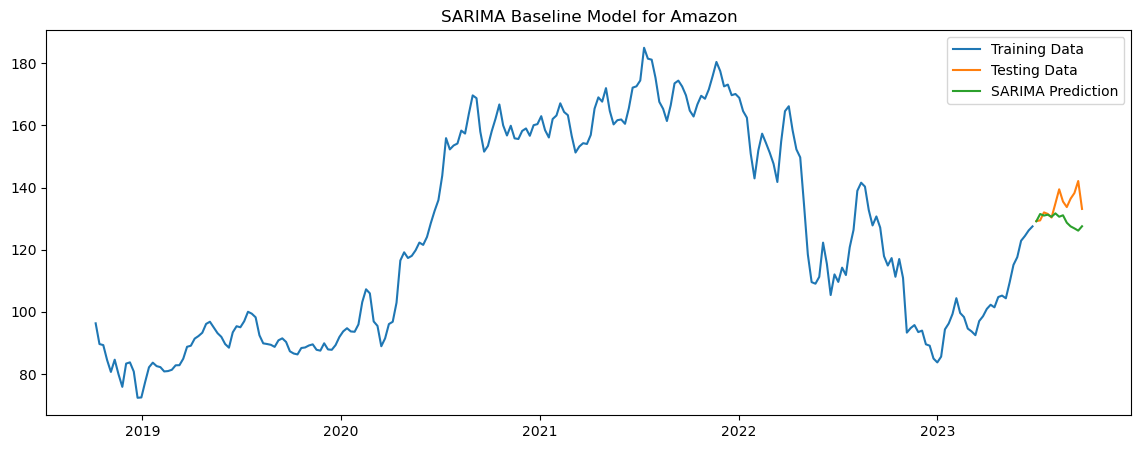

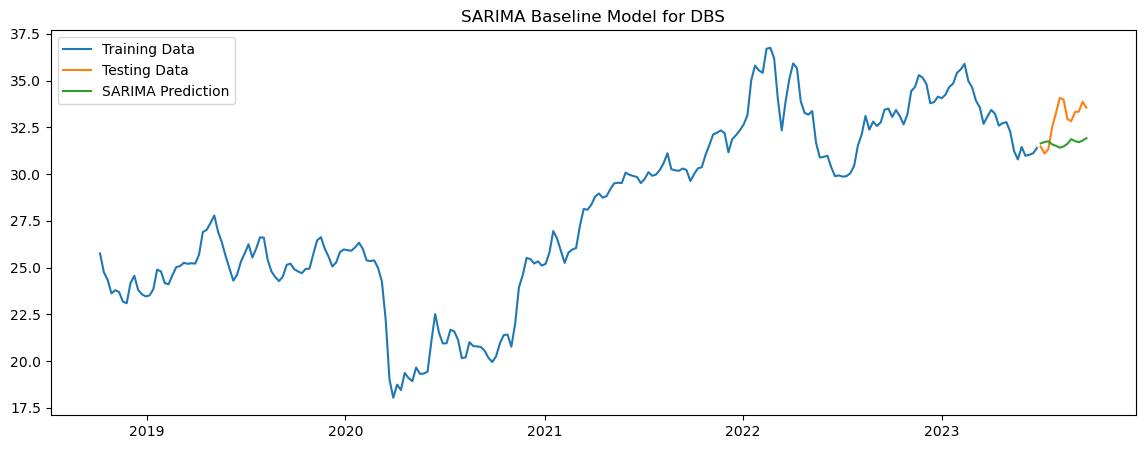

Apple:
  - MAPE: 4.12%
Amazon:
  - MAPE: 3.74%
DBS:
  - MAPE: 4.21%


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df_daily is your DataFrame containing daily stock prices
# Select the columns for 'Apple', 'Amazon', and 'DBS'
selected_columns = ['Apple', 'Amazon', 'DBS']
stock_data = df_daily[selected_columns]

# Resample data to weekly frequency
weekly_data = stock_data.resample('W').mean()

# Define training and testing periods
train_start_date = '2018-01-01'
train_end_date = '2023-06-30'
test_start_date = '2023-07-01'
test_end_date = '2023-09-28'

# Split the data into training and testing sets
train_data = weekly_data[train_start_date:train_end_date]
test_data = weekly_data[test_start_date:test_end_date]

# Initialize dictionaries to store results
mape_results = {}

# Define SARIMA order parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming weekly seasonality

# Iterate over each column
for col in weekly_data.columns:
    # Create and fit SARIMA model for the column
    sarima_model = SARIMAX(train_data[col], order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit(disp=False)

    # Use the model to make predictions for the column
    pred_out_sample = sarima_result.forecast(steps=len(test_data))

    # Calculate MAPE
    mape = np.mean(np.abs((test_data[col] - pred_out_sample) / test_data[col])) * 100
    mape_results[col] = mape

    # Plot the results
    plt.figure(figsize=(14, 5))
    plt.plot(train_data[col], label='Training Data')
    plt.plot(test_data[col], label='Testing Data')
    plt.plot(test_data.index, pred_out_sample, label='SARIMA Prediction')
    plt.title(f'SARIMA Baseline Model for {col}')
    plt.legend()
    plt.show()

# Print MAPE results
for col, mape in mape_results.items():
    print(f'{col}:')
    print(f'  - MAPE: {mape:.2f}%')


### Monthly

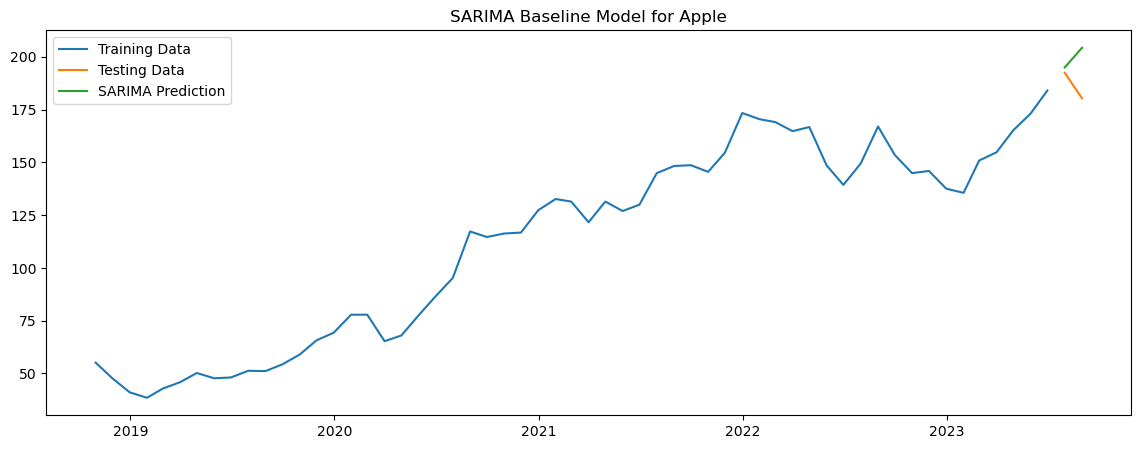

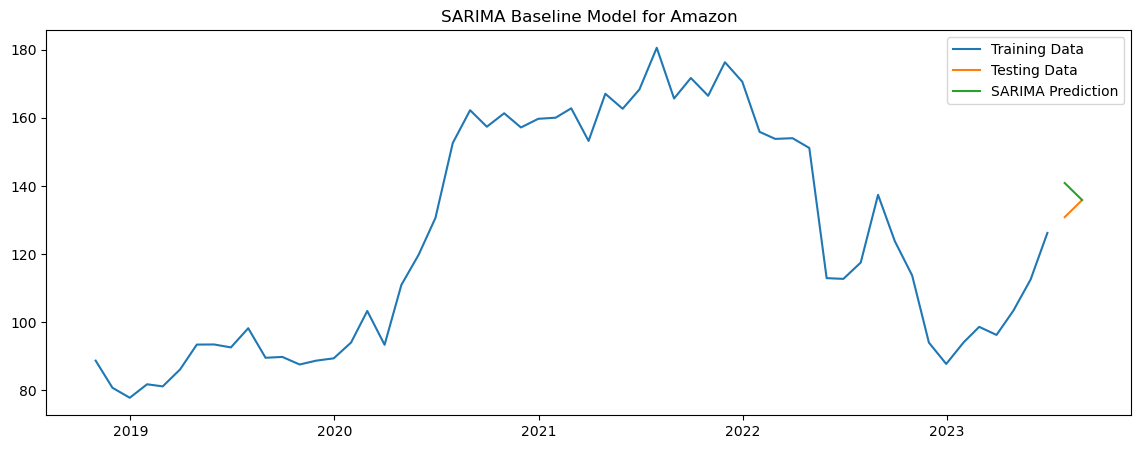

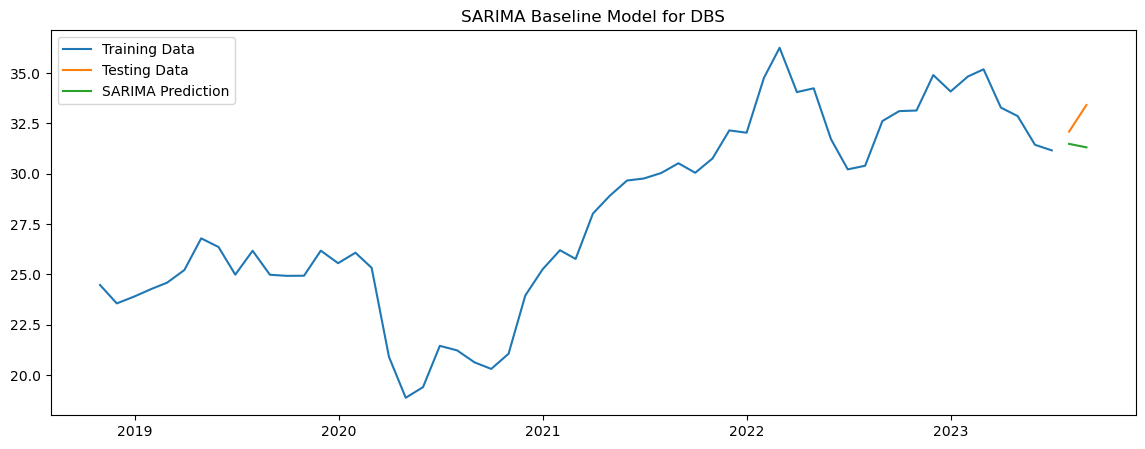

Apple:
  - MAPE: 7.28%
Amazon:
  - MAPE: 3.85%
DBS:
  - MAPE: 4.09%


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df_daily is your DataFrame containing daily stock prices
# Select the columns for 'Apple', 'Amazon', and 'DBS'
selected_columns = ['Apple', 'Amazon', 'DBS']
stock_data = df_daily[selected_columns]

# Downsample data to monthly frequency
monthly_data = stock_data.resample('M').mean()

# Define training and testing periods
train_start_date = '2018-01-01'
train_end_date = '2023-06-30'
test_start_date = '2023-07-01'
test_end_date = '2023-09-28'

# Split the data into training and testing sets
train_data = monthly_data[train_start_date:train_end_date]
test_data = monthly_data[test_start_date:test_end_date]

# Initialize dictionaries to store results
mape_results = {}

# Define SARIMA order parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly seasonality

# Iterate over each column
for col in monthly_data.columns:
    # Create and fit SARIMA model for the column
    sarima_model = SARIMAX(train_data[col], order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit(disp=False)

    # Use the model to make predictions for the column
    pred_out_sample = sarima_result.forecast(steps=len(test_data))

    # Calculate MAPE
    mape = np.mean(np.abs((test_data[col] - pred_out_sample) / test_data[col])) * 100
    mape_results[col] = mape

    # Plot the results
    plt.figure(figsize=(14, 5))
    plt.plot(train_data[col], label='Training Data')
    plt.plot(test_data[col], label='Testing Data')
    plt.plot(test_data.index, pred_out_sample, label='SARIMA Prediction')
    plt.title(f'SARIMA Baseline Model for {col}')
    plt.legend()
    plt.show()

# Print MAPE results
for col, mape in mape_results.items():
    print(f'{col}:')
    print(f'  - MAPE: {mape:.2f}%')


### Baseline SARIMA - Before tuning (Use order = (1,1,1)(1,1,1,30))

In [32]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assuming df_daily is your DataFrame containing daily stock prices
# # Select the columns for 'Apple', 'Amazon', and 'DBS'
# selected_columns = ['Apple', 'Amazon', 'DBS']
# stock_data = df_daily[selected_columns]

# # Define training and testing periods
# train_start_date = '2018-01-01'
# train_end_date = '2023-06-30'
# test_start_date = '2023-07-01'
# test_end_date = '2023-09-28'

# # Split the data into training and testing sets
# train_data = stock_data[train_start_date:train_end_date]
# test_data = stock_data[test_start_date:test_end_date]

# # Define SARIMA model parameters
# order = (1, 1, 1)  # Non-seasonal order (p, d, q)
# seasonal_order = (1, 1, 1, 30)  # Seasonal order (P, D, Q, m)

# # Initialize dictionaries to store results
# mape_results = {}
# aic_results = {}
# bic_results = {}

# # Iterate over each column and fit SARIMA model
# for col in stock_data.columns:
#     # Create and fit SARIMA model
#     sarima_model = SARIMAX(train_data[col], order=order, seasonal_order=seasonal_order)
#     sarima_result = sarima_model.fit(disp=False)
    
#     # Use the model to make predictions
#     pred_out_sample = sarima_result.forecast(steps=len(test_data))
    
#     # Calculate MAPE
#     mape = np.mean(np.abs((test_data[col] - pred_out_sample) / test_data[col])) * 100
#     mape_results[col] = mape
    
#     # Calculate AIC and BIC
#     aic_results[col] = sarima_result.aic
#     bic_results[col] = sarima_result.bic
    
#     # Plot the results
#     plt.figure(figsize=(14, 5))
#     plt.plot(train_data[col], label='Training Data')
#     plt.plot(test_data[col], label='Testing Data')
#     plt.plot(test_data.index, pred_out_sample, label='Prediction')
#     plt.title(f'SARIMA Model for {col}')
#     plt.legend()
#     plt.show()

# # Print MAPE, AIC, and BIC results
# for col in stock_data.columns:
#     print(f'{col}:')
#     print(f'  - MAPE: {mape_results[col]:.2f}%')
#     print(f'  - AIC: {aic_results[col]}')
#     print(f'  - BIC: {bic_results[col]}')

The code in the above cell fits SARIMA models to daily stock price data for Apple, Amazon, and DBS. It splits the data into training and testing sets, defines SARIMA model parameters, and initializes dictionaries to store evaluation metrics. The code iterates over each stock, fits SARIMA models to the training data, makes predictions for the testing period, and calculates MAPE, AIC, and BIC. Visualization is provided for each stock's training data, testing data, and SARIMA predictions. Finally, MAPE, AIC, and BIC results are printed for each stock, offering insights into model accuracy and goodness-of-fit.

___
# Conclusion
___

Despite the challenge posed by the short forecasting period, the SARIMA models for Apple, Amazon, and DBS stocks exhibit satisfactory performance in terms of MAPE, AIC, and BIC metrics. Through parameter grid iteration, the models have been fine-tuned, resulting in improved accuracy. However, it's important to note that the inherent randomness of stock prices remains unpredictable, underscoring a limitation beyond our control.

___
# End Of Report
___